### ProjF5 - Final Model

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### 1. Load and Prepare Data

In [10]:
def read_csv_files(folder_path, num_files=30):
    # Read all CSV files in the specified folder and concatenate them into a single DataFrame
    df_list = []
    company_list = []
    count = 0
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            print(file)
            print(os.path.join(folder_path, file))
            dx = pd.read_csv(os.path.join(folder_path, file))
            print(dx.head())
            # dx = pd.read_csv(os.path.join(folder_path, file))
            # df_list.append(dx)
            df_list.append(dx)
            company_list.append(file)
            print(len(df_list), "len")
            count+=1
            if count == num_files:
                break
    return df_list, company_list
folder_path = '/Users/suryasukumar/Documents/IKA/nasdaq/csv/'
all_stocks_df_list, company_list = read_csv_files(folder_path)

# Drop the 'Date' column
for df_in_list in all_stocks_df_list:
    df_in_list.drop(columns=['Date'], inplace=True)

CSCO.csv
/Users/suryasukumar/Documents/IKA/nasdaq/csv/CSCO.csv
         Date       Low  Open     Volume      High     Close  Adjusted Close
0  16-02-1990  0.073785   0.0  940636800  0.079861  0.077257        0.054863
1  20-02-1990  0.074653   0.0  151862400  0.079861  0.079861        0.056712
2  21-02-1990  0.075521   0.0   70531200  0.078993  0.078125        0.055479
3  22-02-1990  0.078993   0.0   45216000  0.081597  0.078993        0.056095
4  23-02-1990  0.078125   0.0   44697600  0.079861  0.078559        0.055787
1 len
BIOS.csv
/Users/suryasukumar/Documents/IKA/nasdaq/csv/BIOS.csv
         Date   Low  Open  Volume  High  Close  Adjusted Close
0  28-01-2022  9.80  9.81  152800  9.99   9.80            9.80
1  31-01-2022  9.92  9.99    2400  9.99   9.98            9.98
2  01-02-2022  9.98  9.98       0  9.98   9.98            9.98
3  02-02-2022  9.87  9.88     300  9.88   9.87            9.87
4  03-02-2022  9.90  9.90     100  9.90   9.90            9.90
2 len
CSBK.csv
/Users/suryas

### Baseline Model

In [28]:
def create_sequences(data, t, d):
    X, y = [], []
    for i in range(len(data)-t-1):
        a = data[i:(i+t), :d]
        X.append(a)
        y.append(data[i + t, :d])
    return np.array(X), np.array(y)
#baseline
def get_accuracy(df):
    # Scale the features of data
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df)

    # Split the data into training, validation, and testing sets: 70% training, 20% validation, 10% testing
    train_size = int(len(df_scaled) * 0.7)
    val_size = int(len(df_scaled) * 0.2)
    test_size = len(df_scaled) - train_size - val_size
    train, val, test = df_scaled[0:train_size], df_scaled[train_size:train_size+val_size], df_scaled[train_size+val_size:len(df_scaled)]

    # Create sequences of t timesteps with d dimensions
    t = 10 # timesteps
    d = df.shape[1] # dimensions
    X_train, y_train = create_sequences(train, t, d)
    X_val, y_val = create_sequences(val, t, d)
    X_test, y_test = create_sequences(test, t, d)

    # Define input shape as an Input object
    input_shape = (t, d)
    # input_layer = Input(shape=input_shape)

    # Build the model
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(d))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    history = model.fit(X_train,
                        y_train,
                        epochs=10,
                        batch_size=1,
                        verbose=1,
                        validation_data=(X_val, y_val))

    test_error = model.evaluate(X_test, y_test, verbose=2)
    accuracy = (1 - test_error) * 100

    return history.history['val_loss'], accuracy, history.history['loss']

In [29]:
val_loss_list = []
acc_list = []
loss_list= []

for i in range(len(all_stocks_df_list)):
    val_loss, acc, loss = get_accuracy(all_stocks_df_list[i])
    val_loss_list.append(val_loss)
    loss_list.append(loss)
    acc_list.append(acc)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 809us/step - loss: 0.0018 - val_loss: 0.0011
Epoch 2/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 791us/step - loss: 3.3639e-04 - val_loss: 9.6606e-04
Epoch 3/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 786us/step - loss: 3.2544e-04 - val_loss: 0.0011
Epoch 4/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 784us/step - loss: 2.7490e-04 - val_loss: 0.0012
Epoch 5/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 843us/step - loss: 2.7275e-04 - val_loss: 0.0010
Epoch 6/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 813us/step - loss: 3.0462e-04 - val_loss: 0.0013
Epoch 7/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 792us/step - loss: 3.1247e-04 - val_loss: 0.0010
Epoch 8/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 913us/step - loss: 3.0226e-04 - val_loss: 0.0010
Epoch 9/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 6s 983us/step - loss: 3.3625e-04 - val_loss: 0.0011
Epoch 10/10
5777/5777 ━━━━━━━━━━━━━━━━━━━━ 5s 874us/step - loss: 2.9812e-04 - val_loss: 0.0010
26/26 - 0s - 4ms/step - loss: 0.0057
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0121 - val_loss: 0.0058
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0061 - val_loss: 0.0072
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0043 - val_loss: 0.0062
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.0088 - val_loss: 0.0104
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0068 - val_loss: 0.0112
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0095 - val_loss: 0.0063
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.0042 - val_loss: 0.0084
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0061 - val_loss: 0.0076
Epoch 9/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.0048 - val_loss: 0.0074
Epoch 10/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.0052 - val_loss: 0.0074
1/1 - 0s - 66ms/step - loss: 0.0070
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 877us/step - loss: nan - val_loss: nan
Epoch 2/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 808us/step - loss: nan - val_loss: nan
Epoch 3/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 787us/step - loss: nan - val_loss: nan
Epoch 4/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 820us/step - loss: nan - val_loss: nan
Epoch 5/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - loss: nan - val_loss: nan
Epoch 6/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 810us/step - loss: nan - val_loss: nan
Epoch 7/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 963us/step - loss: nan - val_loss: nan
Epoch 8/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: nan - val_loss: nan
Epoch 9/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 829us/step - loss: nan - val_loss: nan
Epoch 10/10
3298/3298 ━━━━━━━━━━━━━━━━━━━━ 3s 780us/step - loss: nan - val_loss: nan
15/15 - 0s - 6ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 811us/step - loss: 6.4133e-04 - val_loss: 8.9877e-04
Epoch 2/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 759us/step - loss: 2.8369e-04 - val_loss: 7.6573e-04
Epoch 3/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 5s 988us/step - loss: 2.8404e-04 - val_loss: 7.5120e-04
Epoch 4/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 893us/step - loss: 2.1434e-04 - val_loss: 8.0477e-04
Epoch 5/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 887us/step - loss: 2.1423e-04 - val_loss: 8.4787e-04
Epoch 6/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 895us/step - loss: 1.7938e-04 - val_loss: 0.0011
Epoch 7/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 879us/step - loss: 2.5513e-04 - val_loss: 0.0011
Epoch 8/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 905us/step - loss: 2.3251e-04 - val_loss: 8.7705e-04
Epoch 9/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step - loss: 2.0649e-04 - val_loss: 9.2689e-04
Epoch 10/10
4839/4839 ━━━━━━━━━━━━━━━━━━━━ 4s 899us/step - loss: 2.0992e-04 - val_loss: 0.0010
22/22 - 0s - 4ms/step - loss: 6.4384e-04
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7532/7532 ━━━━━━━━━━━━━━━━━━━━ 8s 956us/step - loss: 7.8193e-04 - val_loss: 6.2462e-04
Epoch 2/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 7s 898us/step - loss: 1.7288e-04 - val_loss: 4.3655e-04
Epoch 3/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 6s 776us/step - loss: 1.2450e-04 - val_loss: 6.1988e-04
Epoch 4/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 6s 814us/step - loss: 1.1916e-04 - val_loss: 6.3064e-04
Epoch 5/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 7s 902us/step - loss: 1.1473e-04 - val_loss: 5.1926e-04
Epoch 6/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 7s 882us/step - loss: 1.5452e-04 - val_loss: 6.1160e-04
Epoch 7/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 7s 887us/step - loss: 1.3704e-04 - val_loss: 6.8007e-04
Epoch 8/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 7s 888us/step - loss: 1.1545e-04 - val_loss: 5.5425e-04
Epoch 9/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 7s 932us/step - loss: 1.3522e-04 - val_loss: 6.9906e-04
Epoch 10/10
7532/7532 ━━━━━━━━━━━━━━━━━━━━ 7s 927us/step - loss: 1.2058e-04 - val_loss: 5.9846e-04
34/34 - 0s - 5ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6807/6807 ━━━━━━━━━━━━━━━━━━━━ 7s 985us/step - loss: 2.5616e-04 - val_loss: 4.0823e-04
Epoch 2/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 854us/step - loss: 1.6934e-04 - val_loss: 0.0015
Epoch 3/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 842us/step - loss: 1.0810e-04 - val_loss: 2.8828e-04
Epoch 4/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 911us/step - loss: 1.0798e-04 - val_loss: 2.3507e-04
Epoch 5/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 881us/step - loss: 1.1741e-04 - val_loss: 3.2072e-04
Epoch 6/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 890us/step - loss: 9.0928e-05 - val_loss: 4.1448e-04
Epoch 7/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 872us/step - loss: 1.1304e-04 - val_loss: 5.8821e-04
Epoch 8/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 878us/step - loss: 1.3073e-04 - val_loss: 1.4005e-04
Epoch 9/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 934us/step - loss: 1.0708e-04 - val_loss: 1.5462e-04
Epoch 10/10
6807/6807 ━━━━━━━━━━━━━━━━━━━━ 6s 877us/step - loss: 1.6610e-04 - val_loss: 2.6974e-04
31/31 - 0s - 3ms/step - loss: 0.00

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3926/3926 ━━━━━━━━━━━━━━━━━━━━ 4s 920us/step - loss: 0.0019 - val_loss: 7.4920e-05
Epoch 2/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 816us/step - loss: 4.2021e-04 - val_loss: 2.0627e-04
Epoch 3/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 717us/step - loss: 3.2767e-04 - val_loss: 1.4097e-04
Epoch 4/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 711us/step - loss: 3.2551e-04 - val_loss: 5.0070e-05
Epoch 5/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 749us/step - loss: 2.8988e-04 - val_loss: 5.3947e-05
Epoch 6/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 752us/step - loss: 2.7209e-04 - val_loss: 7.6714e-05
Epoch 7/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 737us/step - loss: 2.4720e-04 - val_loss: 8.2774e-05
Epoch 8/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 724us/step - loss: 3.1374e-04 - val_loss: 4.6494e-05
Epoch 9/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 765us/step - loss: 2.6309e-04 - val_loss: 4.7348e-05
Epoch 10/10
3926/3926 ━━━━━━━━━━━━━━━━━━━━ 3s 718us/step - loss: 3.0121e-04 - val_loss: 7.7580e-05
18/18 - 0s - 4ms/step - loss: 2.21

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 750us/step - loss: 0.0022 - val_loss: 0.0011
Epoch 2/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - loss: 3.9980e-04 - val_loss: 0.0012
Epoch 3/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - loss: 2.8859e-04 - val_loss: 9.6544e-04
Epoch 4/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - loss: 2.4289e-04 - val_loss: 8.6522e-04
Epoch 5/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 739us/step - loss: 2.5889e-04 - val_loss: 7.8724e-04
Epoch 6/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - loss: 2.6936e-04 - val_loss: 8.1260e-04
Epoch 7/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - loss: 2.1552e-04 - val_loss: 7.8631e-04
Epoch 8/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - loss: 1.9717e-04 - val_loss: 8.2951e-04
Epoch 9/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - loss: 2.1705e-04 - val_loss: 8.1178e-04
Epoch 10/10
2681/2681 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - loss: 2.1180e-04 - val_loss: 7.8482e-04
12/12 - 0s - 9ms/step - loss: 4.9179e-05
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0261 - val_loss: 0.0048
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.0040 - val_loss: 0.0062
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0039 - val_loss: 0.0031
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.0024 - val_loss: 0.0081
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0044 - val_loss: 0.0033
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 9/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.0026 - val_loss: 0.0026
Epoch 10/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0022 - val_loss: 0.0027
2/2 - 0s - 42ms/step - loss: 0.0056
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7936/7936 ━━━━━━━━━━━━━━━━━━━━ 7s 789us/step - loss: 8.5211e-05 - val_loss: 4.8132e-05
Epoch 2/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 714us/step - loss: 6.2792e-05 - val_loss: 4.2441e-05
Epoch 3/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 781us/step - loss: 2.8960e-05 - val_loss: 3.5042e-05
Epoch 4/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 721us/step - loss: 4.2774e-05 - val_loss: 3.3726e-05
Epoch 5/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 713us/step - loss: 3.9452e-05 - val_loss: 3.5652e-05
Epoch 6/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 719us/step - loss: 3.2973e-05 - val_loss: 3.5699e-05
Epoch 7/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 714us/step - loss: 4.0547e-05 - val_loss: 3.6686e-05
Epoch 8/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 715us/step - loss: 3.1688e-05 - val_loss: 6.5243e-05
Epoch 9/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 720us/step - loss: 2.8936e-05 - val_loss: 4.7951e-05
Epoch 10/10
7936/7936 ━━━━━━━━━━━━━━━━━━━━ 6s 721us/step - loss: 2.5601e-05 - val_loss: 4.0602e-05
36/36 - 0s - 3ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2966/2966 ━━━━━━━━━━━━━━━━━━━━ 3s 724us/step - loss: 0.0051 - val_loss: nan
Epoch 2/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - loss: 3.8458e-04 - val_loss: nan
Epoch 3/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step - loss: 2.4744e-04 - val_loss: nan
Epoch 4/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step - loss: 1.8931e-04 - val_loss: nan
Epoch 5/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step - loss: 1.7709e-04 - val_loss: nan
Epoch 6/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - loss: 1.8452e-04 - val_loss: nan
Epoch 7/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 697us/step - loss: 1.6384e-04 - val_loss: nan
Epoch 8/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 699us/step - loss: 1.6311e-04 - val_loss: nan
Epoch 9/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step - loss: 1.5306e-04 - val_loss: nan
Epoch 10/10
2966/2966 ━━━━━━━━━━━━━━━━━━━━ 2s 708us/step - loss: 1.5005e-04 - val_loss: nan
13/13 - 0s - 5ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4758/4758 ━━━━━━━━━━━━━━━━━━━━ 4s 772us/step - loss: 9.7822e-04 - val_loss: 9.8082e-04
Epoch 2/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 3s 730us/step - loss: 2.5935e-04 - val_loss: 5.3588e-04
Epoch 3/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 3s 730us/step - loss: 3.0248e-04 - val_loss: 2.7976e-04
Epoch 4/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 3s 732us/step - loss: 2.2866e-04 - val_loss: 2.2034e-04
Epoch 5/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 4s 750us/step - loss: 3.2698e-04 - val_loss: 6.2162e-04
Epoch 6/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step - loss: 1.8005e-04 - val_loss: 1.4177e-04
Epoch 7/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step - loss: 2.7492e-04 - val_loss: 4.1970e-04
Epoch 8/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step - loss: 2.2611e-04 - val_loss: 2.0015e-04
Epoch 9/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 4s 749us/step - loss: 1.8641e-04 - val_loss: 3.7581e-04
Epoch 10/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 3s 728us/step - loss: 1.9525e-04 - val_loss: 1.8405e-04
21/21 - 0s - 4ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 774us/step - loss: 2.4387e-04 - val_loss: 3.0446e-04
Epoch 2/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 703us/step - loss: 9.3438e-05 - val_loss: 2.9013e-04
Epoch 3/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 705us/step - loss: 1.2256e-04 - val_loss: 2.6818e-04
Epoch 4/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 712us/step - loss: 1.3076e-04 - val_loss: 3.0309e-04
Epoch 5/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 701us/step - loss: 8.1041e-05 - val_loss: 2.5010e-04
Epoch 6/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 706us/step - loss: 6.6442e-05 - val_loss: 2.0852e-04
Epoch 7/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 707us/step - loss: 1.0743e-04 - val_loss: 1.4215e-04
Epoch 8/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 702us/step - loss: 9.1629e-05 - val_loss: 3.6714e-04
Epoch 9/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 707us/step - loss: 1.3250e-04 - val_loss: 1.7444e-04
Epoch 10/10
6464/6464 ━━━━━━━━━━━━━━━━━━━━ 5s 711us/step - loss: 7.8117e-05 - val_loss: 1.4394e-04
29/29 - 0s - 3ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 751us/step - loss: 6.2000e-04 - val_loss: 0.0014
Epoch 2/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 699us/step - loss: 5.7285e-04 - val_loss: 0.0024
Epoch 3/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step - loss: 5.5276e-04 - val_loss: 0.0017
Epoch 4/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 741us/step - loss: 4.7289e-04 - val_loss: 0.0025
Epoch 5/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 737us/step - loss: 5.1802e-04 - val_loss: 0.0024
Epoch 6/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 703us/step - loss: 7.5483e-04 - val_loss: 0.0021
Epoch 7/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 701us/step - loss: 4.0280e-04 - val_loss: 0.0028
Epoch 8/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 699us/step - loss: 4.3885e-04 - val_loss: 0.0019
Epoch 9/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 705us/step - loss: 4.2149e-04 - val_loss: 0.0019
Epoch 10/10
3950/3950 ━━━━━━━━━━━━━━━━━━━━ 3s 715us/step - loss: 4.8061e-04 - val_loss: 0.0024
18/18 - 0s - 4ms/step - loss: 0.0206
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 795us/step - loss: 0.0013 - val_loss: 1.5853e-04
Epoch 2/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 759us/step - loss: 3.1825e-04 - val_loss: 1.9555e-04
Epoch 3/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 760us/step - loss: 2.9743e-04 - val_loss: 1.5141e-04
Epoch 4/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 749us/step - loss: 3.3011e-04 - val_loss: 1.5273e-04
Epoch 5/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 5s 710us/step - loss: 2.6942e-04 - val_loss: 1.5487e-04
Epoch 6/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 764us/step - loss: 2.5496e-04 - val_loss: 1.6002e-04
Epoch 7/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 771us/step - loss: 2.4906e-04 - val_loss: 1.6623e-04
Epoch 8/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 774us/step - loss: 2.3680e-04 - val_loss: 1.5585e-04
Epoch 9/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 6s 743us/step - loss: 3.3604e-04 - val_loss: 1.5367e-04
Epoch 10/10
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 5s 721us/step - loss: 2.8694e-04 - val_loss: 2.0095e-04
34/34 - 0s - 2ms/step - loss: 3.21

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 711us/step - loss: 4.5137e-04 - val_loss: 3.7066e-04
Epoch 2/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 715us/step - loss: 1.1240e-04 - val_loss: 3.3600e-04
Epoch 3/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 698us/step - loss: 1.1693e-04 - val_loss: 1.3902e-04
Epoch 4/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 703us/step - loss: 1.3560e-04 - val_loss: 4.0318e-04
Epoch 5/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 714us/step - loss: 1.1450e-04 - val_loss: 1.5526e-04
Epoch 6/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 860us/step - loss: 1.0083e-04 - val_loss: 2.1610e-04
Epoch 7/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 849us/step - loss: 9.8248e-05 - val_loss: 1.6423e-04
Epoch 8/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 748us/step - loss: 1.3326e-04 - val_loss: 5.5963e-04
Epoch 9/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 747us/step - loss: 1.3894e-04 - val_loss: 1.9301e-04
Epoch 10/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 753us/step - loss: 2.2299e-04 - val_loss: 1.6177e-04
23/23 - 0s - 3ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 784us/step - loss: 8.8154e-04 - val_loss: 0.0036
Epoch 2/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - loss: 4.8922e-04 - val_loss: 0.0032
Epoch 3/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - loss: 5.3624e-04 - val_loss: 0.0027
Epoch 4/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - loss: 4.4181e-04 - val_loss: 0.0020
Epoch 5/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - loss: 5.8770e-04 - val_loss: 0.0023
Epoch 6/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - loss: 4.2079e-04 - val_loss: 0.0032
Epoch 7/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - loss: 6.5359e-04 - val_loss: 0.0016
Epoch 8/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - loss: 5.8890e-04 - val_loss: 0.0020
Epoch 9/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - loss: 5.4483e-04 - val_loss: 0.0018
Epoch 10/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 3.8984e-04 - val_loss: 0.0017
7/7 - 0s - 10ms/step - loss: 0.0017
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4144/4144 ━━━━━━━━━━━━━━━━━━━━ 4s 812us/step - loss: 0.0079 - val_loss: 3.3230e-04
Epoch 2/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 5.4961e-04 - val_loss: 2.6648e-04
Epoch 3/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 4s 976us/step - loss: 4.0152e-04 - val_loss: 2.9433e-04
Epoch 4/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 4s 900us/step - loss: 4.8599e-04 - val_loss: 2.1685e-04
Epoch 5/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 3s 838us/step - loss: 3.9686e-04 - val_loss: 2.6313e-04
Epoch 6/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 3s 715us/step - loss: 4.7458e-04 - val_loss: 2.3469e-04
Epoch 7/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 3s 709us/step - loss: 3.1721e-04 - val_loss: 2.5182e-04
Epoch 8/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 3s 706us/step - loss: 3.8989e-04 - val_loss: 2.2227e-04
Epoch 9/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 3s 734us/step - loss: 3.6297e-04 - val_loss: 2.8104e-04
Epoch 10/10
4144/4144 ━━━━━━━━━━━━━━━━━━━━ 3s 717us/step - loss: 4.0084e-04 - val_loss: 3.6112e-04
19/19 - 0s - 4ms/step - loss: 4.2242

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4763/4763 ━━━━━━━━━━━━━━━━━━━━ 4s 744us/step - loss: 9.7120e-04 - val_loss: 1.6054e-04
Epoch 2/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step - loss: 2.4697e-04 - val_loss: 1.2165e-04
Epoch 3/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 3s 703us/step - loss: 1.7503e-04 - val_loss: 1.0694e-04
Epoch 4/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 3s 709us/step - loss: 1.9424e-04 - val_loss: 8.3196e-05
Epoch 5/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 4s 819us/step - loss: 1.7774e-04 - val_loss: 7.3046e-05
Epoch 6/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 4s 755us/step - loss: 1.4407e-04 - val_loss: 7.2086e-05
Epoch 7/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 4s 907us/step - loss: 1.6024e-04 - val_loss: 7.2559e-05
Epoch 8/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 4s 890us/step - loss: 1.4619e-04 - val_loss: 7.1012e-05
Epoch 9/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 4s 798us/step - loss: 1.4916e-04 - val_loss: 7.0018e-05
Epoch 10/10
4763/4763 ━━━━━━━━━━━━━━━━━━━━ 4s 907us/step - loss: 1.6049e-04 - val_loss: 7.4312e-05
21/21 - 0s - 7ms/step - loss: 

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2013/2013 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step - loss: nan - val_loss: nan
Epoch 2/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - loss: nan - val_loss: nan
Epoch 3/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - loss: nan - val_loss: nan
Epoch 4/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - loss: nan - val_loss: nan
Epoch 5/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - loss: nan - val_loss: nan
Epoch 6/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - loss: nan - val_loss: nan
Epoch 7/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - loss: nan - val_loss: nan
Epoch 8/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - loss: nan - val_loss: nan
Epoch 9/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - loss: nan - val_loss: nan
Epoch 10/10
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - loss: nan - val_loss: nan
9/9 - 0s - 12ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6245/6245 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 8.1538e-04 - val_loss: 9.0055e-04
Epoch 2/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 5s 864us/step - loss: 2.2054e-04 - val_loss: 0.0010
Epoch 3/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 5s 750us/step - loss: 2.1216e-04 - val_loss: 5.8209e-04
Epoch 4/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 5s 808us/step - loss: 2.3358e-04 - val_loss: 6.6575e-04
Epoch 5/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.8044e-04 - val_loss: 3.5835e-04
Epoch 6/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 5s 834us/step - loss: 2.2717e-04 - val_loss: 8.2455e-04
Epoch 7/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 5s 793us/step - loss: 2.2501e-04 - val_loss: 4.1146e-04
Epoch 8/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 6s 966us/step - loss: 1.9027e-04 - val_loss: 3.3414e-04
Epoch 9/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 6s 958us/step - loss: 2.2368e-04 - val_loss: 4.6072e-04
Epoch 10/10
6245/6245 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 2.0860e-04 - val_loss: 4.0926e-04
28/28 - 0s - 5ms/step - loss: 0.0012
Epo

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3173/3173 ━━━━━━━━━━━━━━━━━━━━ 3s 814us/step - loss: 0.0033 - val_loss: 3.3729e-04
Epoch 2/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - loss: 4.5389e-04 - val_loss: 2.2393e-04
Epoch 3/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - loss: 4.0631e-04 - val_loss: 2.1453e-04
Epoch 4/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 3s 970us/step - loss: 2.9006e-04 - val_loss: 1.6060e-04
Epoch 5/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - loss: 3.2414e-04 - val_loss: 2.2684e-04
Epoch 6/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 3s 889us/step - loss: 2.5258e-04 - val_loss: 1.6329e-04
Epoch 7/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 3s 874us/step - loss: 2.4709e-04 - val_loss: 1.6290e-04
Epoch 8/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 3s 958us/step - loss: 2.7976e-04 - val_loss: 1.5226e-04
Epoch 9/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 2s 763us/step - loss: 2.4779e-04 - val_loss: 1.6681e-04
Epoch 10/10
3173/3173 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - loss: 3.1725e-04 - val_loss: 1.4826e-04
14/14 - 0s - 5ms/step - loss: 8.54

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7533/7533 ━━━━━━━━━━━━━━━━━━━━ 6s 723us/step - loss: 3.7069e-04 - val_loss: 0.0015
Epoch 2/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 5s 723us/step - loss: 9.5591e-05 - val_loss: 4.5712e-04
Epoch 3/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 5s 718us/step - loss: 9.9706e-05 - val_loss: 7.5922e-04
Epoch 4/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 6s 741us/step - loss: 8.8390e-05 - val_loss: 8.0840e-04
Epoch 5/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 7s 917us/step - loss: 8.6746e-05 - val_loss: 6.4613e-04
Epoch 6/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 7s 863us/step - loss: 7.9845e-05 - val_loss: 6.4531e-04
Epoch 7/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 6s 788us/step - loss: 7.2988e-05 - val_loss: 5.5655e-04
Epoch 8/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 6s 828us/step - loss: 7.7685e-05 - val_loss: 0.0015
Epoch 9/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 7s 882us/step - loss: 7.9888e-05 - val_loss: 6.0201e-04
Epoch 10/10
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 7s 896us/step - loss: 8.1223e-05 - val_loss: 4.3717e-04
34/34 - 0s - 3ms/step - loss: 0.0020
E

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5455/5455 ━━━━━━━━━━━━━━━━━━━━ 6s 978us/step - loss: 0.0011 - val_loss: 2.6412e-04
Epoch 2/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 936us/step - loss: 2.1491e-04 - val_loss: 2.3122e-04
Epoch 3/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 907us/step - loss: 2.0807e-04 - val_loss: 2.2844e-04
Epoch 4/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 911us/step - loss: 1.7509e-04 - val_loss: 2.0733e-04
Epoch 5/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 916us/step - loss: 1.6766e-04 - val_loss: 2.1258e-04
Epoch 6/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 951us/step - loss: 1.6322e-04 - val_loss: 2.1739e-04
Epoch 7/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 874us/step - loss: 1.6652e-04 - val_loss: 2.3500e-04
Epoch 8/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 926us/step - loss: 1.6241e-04 - val_loss: 2.1821e-04
Epoch 9/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 910us/step - loss: 1.5662e-04 - val_loss: 2.0371e-04
Epoch 10/10
5455/5455 ━━━━━━━━━━━━━━━━━━━━ 5s 903us/step - loss: 1.5606e-04 - val_loss: 2.0502e-04
25/25 - 0s - 5ms/step - loss: 5.94

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1508/1508 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - loss: 0.0028 - val_loss: 0.0011
Epoch 2/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 4.5269e-04 - val_loss: 0.0010
Epoch 3/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.6205e-04 - val_loss: 8.7024e-04
Epoch 4/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 3.0617e-04 - val_loss: 9.2476e-04
Epoch 5/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 2.9344e-04 - val_loss: 9.0307e-04
Epoch 6/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: 2.9107e-04 - val_loss: 8.9287e-04
Epoch 7/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 2.7806e-04 - val_loss: 8.4292e-04
Epoch 8/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - loss: 2.6609e-04 - val_loss: 8.6884e-04
Epoch 9/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - loss: 2.4138e-04 - val_loss: 8.9365e-04
Epoch 10/10
1508/1508 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - loss: 2.3946e-04 - val_loss: 8.4274e-04
7/7 - 0s - 12ms/step - loss: 1.7737e-04
Epoc

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6932/6932 ━━━━━━━━━━━━━━━━━━━━ 6s 835us/step - loss: 0.0015 - val_loss: 2.4760e-04
Epoch 2/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 5s 748us/step - loss: 5.7953e-04 - val_loss: 1.7501e-04
Epoch 3/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 5s 749us/step - loss: 4.9791e-04 - val_loss: 1.3425e-04
Epoch 4/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 5s 725us/step - loss: 4.4499e-04 - val_loss: 1.9947e-04
Epoch 5/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 6s 919us/step - loss: 4.0317e-04 - val_loss: 1.7116e-04
Epoch 6/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 6s 896us/step - loss: 3.9850e-04 - val_loss: 1.3969e-04
Epoch 7/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 6s 852us/step - loss: 3.9764e-04 - val_loss: 1.3501e-04
Epoch 8/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 5s 789us/step - loss: 4.2741e-04 - val_loss: 2.2324e-04
Epoch 9/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 6s 800us/step - loss: 3.8297e-04 - val_loss: 1.5372e-04
Epoch 10/10
6932/6932 ━━━━━━━━━━━━━━━━━━━━ 5s 741us/step - loss: 4.0960e-04 - val_loss: 1.2968e-04
31/31 - 0s - 3ms/step - loss: 9.41

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 737us/step - loss: nan - val_loss: nan
Epoch 2/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 732us/step - loss: nan - val_loss: nan
Epoch 3/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 748us/step - loss: nan - val_loss: nan
Epoch 4/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 765us/step - loss: nan - val_loss: nan
Epoch 5/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 6s 904us/step - loss: nan - val_loss: nan
Epoch 6/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 731us/step - loss: nan - val_loss: nan
Epoch 7/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 725us/step - loss: nan - val_loss: nan
Epoch 8/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 716us/step - loss: nan - val_loss: nan
Epoch 9/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 5s 783us/step - loss: nan - val_loss: nan
Epoch 10/10
6319/6319 ━━━━━━━━━━━━━━━━━━━━ 6s 922us/step - loss: nan - val_loss: nan
28/28 - 0s - 5ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5045/5045 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0017 - val_loss: 3.2209e-04
Epoch 2/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 5s 905us/step - loss: 2.8736e-04 - val_loss: 3.1792e-04
Epoch 3/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 839us/step - loss: 2.3531e-04 - val_loss: 4.4959e-04
Epoch 4/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 737us/step - loss: 2.2040e-04 - val_loss: 2.6072e-04
Epoch 5/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 854us/step - loss: 2.4741e-04 - val_loss: 2.4252e-04
Epoch 6/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 862us/step - loss: 2.5851e-04 - val_loss: 2.5725e-04
Epoch 7/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 828us/step - loss: 2.3257e-04 - val_loss: 2.3889e-04
Epoch 8/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 836us/step - loss: 2.9649e-04 - val_loss: 2.4513e-04
Epoch 9/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 855us/step - loss: 2.0526e-04 - val_loss: 2.3317e-04
Epoch 10/10
5045/5045 ━━━━━━━━━━━━━━━━━━━━ 4s 875us/step - loss: 1.7136e-04 - val_loss: 2.3641e-04
23/23 - 0s - 4ms/step - loss: 2.8492

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4984/4984 ━━━━━━━━━━━━━━━━━━━━ 5s 916us/step - loss: 0.0025 - val_loss: 1.9445e-04
Epoch 2/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 5s 902us/step - loss: 6.3933e-04 - val_loss: 1.5825e-04
Epoch 3/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 5s 967us/step - loss: 4.4447e-04 - val_loss: 1.7456e-04
Epoch 4/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 4s 868us/step - loss: 4.3925e-04 - val_loss: 1.3947e-04
Epoch 5/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 4s 881us/step - loss: 4.0562e-04 - val_loss: 1.6753e-04
Epoch 6/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 4s 765us/step - loss: 3.9314e-04 - val_loss: 1.9442e-04
Epoch 7/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 4s 739us/step - loss: 3.7819e-04 - val_loss: 1.5955e-04
Epoch 8/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 4s 712us/step - loss: 4.3434e-04 - val_loss: 1.6347e-04
Epoch 9/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 4s 708us/step - loss: 5.2740e-04 - val_loss: 1.0945e-04
Epoch 10/10
4984/4984 ━━━━━━━━━━━━━━━━━━━━ 4s 732us/step - loss: 4.0635e-04 - val_loss: 1.0348e-04
22/22 - 0s - 5ms/step - loss: 2.08

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3093/3093 ━━━━━━━━━━━━━━━━━━━━ 3s 860us/step - loss: 0.0012 - val_loss: 7.1544e-05
Epoch 2/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 747us/step - loss: 5.6570e-04 - val_loss: 6.8725e-05
Epoch 3/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - loss: 5.2437e-04 - val_loss: 1.4880e-04
Epoch 4/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - loss: 3.9691e-04 - val_loss: 5.6362e-05
Epoch 5/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - loss: 4.4589e-04 - val_loss: 5.1242e-05
Epoch 6/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 762us/step - loss: 4.7652e-04 - val_loss: 5.2712e-05
Epoch 7/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 748us/step - loss: 3.5553e-04 - val_loss: 1.2321e-04
Epoch 8/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - loss: 6.5172e-04 - val_loss: 7.4876e-05
Epoch 9/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 777us/step - loss: 3.1807e-04 - val_loss: 7.4506e-05
Epoch 10/10
3093/3093 ━━━━━━━━━━━━━━━━━━━━ 2s 765us/step - loss: 4.0969e-04 - val_loss: 6.9541e-05
14/14 - 0s - 6ms/step - loss: 1.06

In [11]:
all_stocks_df_list[0].head()

,Low,Open,Volume,High,Close,Adjusted Close
0,0.073785,0.0,940636800,0.079861,0.077257,0.054863
1,0.074653,0.0,151862400,0.079861,0.079861,0.056712
2,0.075521,0.0,70531200,0.078993,0.078125,0.055479
3,0.078993,0.0,45216000,0.081597,0.078993,0.056095
4,0.078125,0.0,44697600,0.079861,0.078559,0.055787


### 2. Prepare your Final Model

## Adding Hyperparameters to the Baseline and Implementing L2 Regularization after observed overfitting

In [12]:
from tensorflow.keras.layers import Bidirectional
from keras.regularizers import l2

In [14]:
def create_sequences_bi(data, t, d):
    X, y = [], []
    for i in range(len(data)-t-1):
        a = data[i:(i+t), :d]
        X.append(a)
        y.append(data[i + t, :d])
    return np.array(X), np.array(y)

def get_accuracy_bi(df):
    # Scale the features of data
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df)

    # Split the data into training, validation, and testing sets: 70% training, 20% validation, 10% testing
    train_size = int(len(df_scaled) * 0.7)
    val_size = int(len(df_scaled) * 0.2)
    test_size = len(df_scaled) - train_size - val_size
    train, val, test = df_scaled[0:train_size], df_scaled[train_size:train_size+val_size], df_scaled[train_size+val_size:len(df_scaled)]

    # Create sequences of t timesteps with d dimensions
    t = 15  # timesteps
    d = df.shape[1]  # dimensions
    X_train, y_train = create_sequences_bi(train, t, d)
    X_val, y_val = create_sequences_bi(val, t, d)
    X_test, y_test = create_sequences_bi(test, t, d)

    # Define input shape as an Input object
    input_shape = (t, d)

    # Build the model
    model_bi = Sequential()
    model_bi.add(Bidirectional(LSTM(50, input_shape=input_shape, kernel_regularizer=l2(0.01))))
    model_bi.add(Dense(d))

    # Compile the model
    model_bi.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    history = model_bi.fit(X_train,
                        y_train,
                        epochs=10,
                        batch_size=1,
                        verbose=1,
                        validation_data=(X_val, y_val))

    test_error_bi = model_bi.evaluate(X_test, y_test, verbose=2)
    accuracy = (1 - test_error_bi) * 100

    return history.history['val_loss'], accuracy, history.history['loss']

In [15]:
val_loss_bi = []
acc_list_bi = []
loss_bi = []

for i in range(len(all_stocks_df_list)):
    val_loss, acc, loss = get_accuracy_bi(all_stocks_df_list[i])
    val_loss_bi.append(val_loss)
    acc_list_bi.append(acc)
    loss_bi.append(loss)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5772/5772 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0139 - val_loss: 0.0016
Epoch 2/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 3/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 4/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 9.7783e-04 - val_loss: 0.0016
Epoch 5/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 8.3834e-04 - val_loss: 0.0022
Epoch 6/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.6253e-04 - val_loss: 0.0013
Epoch 7/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.1800e-04 - val_loss: 0.0013
Epoch 8/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.2355e-04 - val_loss: 0.0011
Epoch 9/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.9807e-04 - val_loss: 0.0015
Epoch 10/10
5772/5772 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.0003e-04 - val_loss: 0.0012
26/26 - 0s - 6ms/step - loss: 0.0055
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1861 - val_loss: 0.0409
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 - val_loss: 0.0176
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 - val_loss: 0.0154
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 - val_loss: 0.0172
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 - val_loss: 0.0146
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0075
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0248
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0090 - val_loss: 0.0182
Epoch 9/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - val_loss: 0.0251
Epoch 10/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - val_loss: 0.0086
1/1 - 0s - 99ms/step - loss: 0.0024
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3293/3293 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
3293/3293 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: nan - val_loss: nan
15/15 - 0s - 9ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4834/4834 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0173 - val_loss: 0.0034
Epoch 2/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 3/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 8.5362e-04 - val_loss: 0.0068
Epoch 4/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 8.2940e-04 - val_loss: 0.0046
Epoch 5/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 7.1463e-04 - val_loss: 0.0043
Epoch 6/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.8836e-04 - val_loss: 0.0050
Epoch 7/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.4679e-04 - val_loss: 0.0065
Epoch 8/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 7.3579e-04 - val_loss: 0.0052
Epoch 9/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.3333e-04 - val_loss: 0.0047
Epoch 10/10
4834/4834 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 7.4399e-04 - val_loss: 0.0056
22/22 - 0s - 6ms/step - loss: 0.0049
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7527/7527 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0112 - val_loss: 0.0034
Epoch 2/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 8.8711e-04 - val_loss: 0.0039
Epoch 3/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 7.0785e-04 - val_loss: 0.0029
Epoch 4/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 6.1240e-04 - val_loss: 0.0037
Epoch 5/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 6.0599e-04 - val_loss: 0.0034
Epoch 6/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 5.4648e-04 - val_loss: 0.0031
Epoch 7/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 5.8793e-04 - val_loss: 0.0037
Epoch 8/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 5.4055e-04 - val_loss: 0.0031
Epoch 9/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 5.1568e-04 - val_loss: 0.0047
Epoch 10/10
7527/7527 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 4.8209e-04 - val_loss: 0.0033
34/34 - 0s - 4ms/step - loss: 0.0094
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6802/6802 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0107 - val_loss: 0.0132
Epoch 2/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5.6386e-04 - val_loss: 0.0018
Epoch 3/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5.2972e-04 - val_loss: 0.0019
Epoch 4/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 4.8821e-04 - val_loss: 0.0026
Epoch 5/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 4.2599e-04 - val_loss: 0.0032
Epoch 6/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 3.0509e-04 - val_loss: 0.0035
Epoch 7/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 3.3717e-04 - val_loss: 0.0025
Epoch 8/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 3.6840e-04 - val_loss: 0.0041
Epoch 9/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 3.5396e-04 - val_loss: 0.0068
Epoch 10/10
6802/6802 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 3.2854e-04 - val_loss: 0.0027
30/30 - 0s - 5ms/step - loss: 0.0133
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0230 - val_loss: 0.0012
Epoch 2/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 3/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0017 - val_loss: 9.0804e-04
Epoch 4/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0015 - val_loss: 8.2873e-04
Epoch 5/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0014 - val_loss: 8.2998e-04
Epoch 6/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0012 - val_loss: 7.4827e-04
Epoch 9/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0011 - val_loss: 6.6789e-04
Epoch 10/10
3921/3921 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0011 - val_loss: 4.9971e-04
18/18 - 0s - 7ms/step - loss: 0.0046
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2676/2676 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0295 - val_loss: 0.0027
Epoch 2/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0020 - val_loss: 0.0025
Epoch 3/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 4/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 5/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 6/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 7/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 8.4844e-04 - val_loss: 0.0016
Epoch 8/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.1222e-04 - val_loss: 0.0017
Epoch 9/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.3964e-04 - val_loss: 0.0016
Epoch 10/10
2676/2676 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.9022e-04 - val_loss: 0.0016
12/12 - 0s - 10ms/step - loss: 2.7989e-04
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1370 - val_loss: 0.0176
Epoch 2/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0154 - val_loss: 0.0103
Epoch 3/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 4/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0187
Epoch 5/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 6/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0090 - val_loss: 0.0067
Epoch 7/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0076
Epoch 8/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - val_loss: 0.0066
Epoch 9/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062 - val_loss: 0.0057
Epoch 10/10
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0071
2/2 - 0s - 53ms/step - loss: 0.0129
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7931/7931 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0084 - val_loss: 9.2288e-05
Epoch 2/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 8.0103e-05 - val_loss: 9.3960e-05
Epoch 3/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.1104e-04 - val_loss: 8.2460e-05
Epoch 4/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 8.4107e-05 - val_loss: 3.7455e-04
Epoch 5/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 9.1197e-05 - val_loss: 3.9943e-04
Epoch 6/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 1.5918e-04 - val_loss: 9.9131e-05
Epoch 7/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 7.5389e-05 - val_loss: 6.1699e-05
Epoch 8/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.1826e-04 - val_loss: 4.5336e-04
Epoch 9/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.4743e-04 - val_loss: 9.6475e-05
Epoch 10/10
7931/7931 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 6.8665e-05 - val_loss: 2.2361e-04
36/36 - 0s - 4ms/step - loss: 0.0297
Epoch 1

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2961/2961 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0270 - val_loss: nan
Epoch 2/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0020 - val_loss: nan
Epoch 3/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0017 - val_loss: nan
Epoch 4/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012 - val_loss: nan
Epoch 5/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.6480e-04 - val_loss: nan
Epoch 6/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.2839e-04 - val_loss: nan
Epoch 7/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 7.0894e-04 - val_loss: nan
Epoch 8/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 6.6992e-04 - val_loss: nan
Epoch 9/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.8685e-04 - val_loss: nan
Epoch 10/10
2961/2961 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.6514e-04 - val_loss: nan
13/13 - 0s - 10ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4753/4753 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0156 - val_loss: 0.0012
Epoch 2/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 9.5246e-04 - val_loss: 0.0019
Epoch 3/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 7.2813e-04 - val_loss: 0.0033
Epoch 4/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 7.5359e-04 - val_loss: 0.0021
Epoch 5/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.7766e-04 - val_loss: 0.0014
Epoch 6/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.8162e-04 - val_loss: 0.0022
Epoch 7/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.9271e-04 - val_loss: 0.0022
Epoch 8/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.0863e-04 - val_loss: 0.0036
Epoch 9/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.7839e-04 - val_loss: 0.0013
Epoch 10/10
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.8087e-04 - val_loss: 0.0016
21/21 - 0s - 6ms/step - loss: 0.0182
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6459/6459 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0106 - val_loss: 0.0011
Epoch 2/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 3.0598e-04 - val_loss: 0.0020
Epoch 3/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.4581e-04 - val_loss: 9.7971e-04
Epoch 4/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 2.5329e-04 - val_loss: 7.9878e-04
Epoch 5/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 2.1915e-04 - val_loss: 6.8291e-04
Epoch 6/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.2515e-04 - val_loss: 5.5441e-04
Epoch 7/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 2.0442e-04 - val_loss: 5.4108e-04
Epoch 8/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2.0871e-04 - val_loss: 8.0506e-04
Epoch 9/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.9405e-04 - val_loss: 9.8706e-04
Epoch 10/10
6459/6459 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.8472e-04 - val_loss: 0.0019
29/29 - 0s - 5ms/step - loss: 0.0131
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3945/3945 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0165 - val_loss: 0.0243
Epoch 2/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.6951e-04 - val_loss: 0.0211
Epoch 3/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0010 - val_loss: 0.0210
Epoch 4/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.6450e-04 - val_loss: 0.0315
Epoch 5/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.2226e-04 - val_loss: 0.0330
Epoch 6/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.2538e-04 - val_loss: 0.0322
Epoch 7/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.0484e-04 - val_loss: 0.0346
Epoch 8/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.9291e-04 - val_loss: 0.0342
Epoch 9/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6.7930e-04 - val_loss: 0.0321
Epoch 10/10
3945/3945 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 7.6302e-04 - val_loss: 0.0326
18/18 - 0s - 7ms/step - loss: 0.2173
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7483/7483 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0134 - val_loss: 8.4785e-04
Epoch 2/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0012 - val_loss: 7.9406e-04
Epoch 3/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 9.2923e-04 - val_loss: 5.7470e-04
Epoch 4/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 8.3405e-04 - val_loss: 6.1588e-04
Epoch 5/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 7.2628e-04 - val_loss: 9.3884e-04
Epoch 6/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 7.2779e-04 - val_loss: 5.0939e-04
Epoch 7/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 6.8415e-04 - val_loss: 5.6618e-04
Epoch 8/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 9.3885e-04 - val_loss: 5.8180e-04
Epoch 9/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 7.1382e-04 - val_loss: 5.8844e-04
Epoch 10/10
7483/7483 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 7.9008e-04 - val_loss: 0.0011
33/33 - 0s - 4ms/step - loss: 0.0013
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0141 - val_loss: 7.5208e-04
Epoch 2/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.9247e-04 - val_loss: 0.0046
Epoch 3/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.0204e-04 - val_loss: 0.0013
Epoch 4/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.6137e-04 - val_loss: 0.0018
Epoch 5/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.0753e-04 - val_loss: 0.0028
Epoch 6/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2.9213e-04 - val_loss: 0.0046
Epoch 7/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.1072e-04 - val_loss: 0.0011
Epoch 8/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2.8716e-04 - val_loss: 0.0020
Epoch 9/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.0528e-04 - val_loss: 0.0013
Epoch 10/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.0573e-04 - val_loss: 0.0012
23/23 - 0s - 6ms/step - loss: 0.0402
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0312 - val_loss: 0.0054
Epoch 2/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0013 - val_loss: 0.0115
Epoch 3/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 4/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0010 - val_loss: 0.0058
Epoch 5/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0011 - val_loss: 0.0119
Epoch 6/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.6513e-04 - val_loss: 0.0115
Epoch 7/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.2594e-04 - val_loss: 0.0138
Epoch 8/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.5860e-04 - val_loss: 0.0141
Epoch 9/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.6640e-04 - val_loss: 0.0153
Epoch 10/10
1591/1591 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.1715e-04 - val_loss: 0.0194
7/7 - 0s - 17ms/step - loss: 0.0031
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4139/4139 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0260 - val_loss: 0.0034
Epoch 2/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 3/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 4/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 5/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0013 - val_loss: 0.0024
Epoch 6/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 7/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 8/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 9/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 10/10
4139/4139 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0011 - val_loss: 0.0024
19/19 - 0s - 7ms/step - loss: 0.0066
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4758/4758 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0176 - val_loss: 0.0013
Epoch 2/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0017 - val_loss: 3.6990e-04
Epoch 3/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0013 - val_loss: 3.4190e-04
Epoch 4/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011 - val_loss: 3.3277e-04
Epoch 5/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 7.4889e-04 - val_loss: 3.3725e-04
Epoch 6/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 7.2994e-04 - val_loss: 2.9937e-04
Epoch 7/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.5340e-04 - val_loss: 2.7300e-04
Epoch 8/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 6.0460e-04 - val_loss: 3.8882e-04
Epoch 9/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.9913e-04 - val_loss: 2.6279e-04
Epoch 10/10
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 5.8710e-04 - val_loss: 2.4754e-04
21/21 - 0s - 6ms/step - loss: 6.4735e-04
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2008/2008 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
2008/2008 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: nan - val_loss: nan
9/9 - 0s - 15ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6240/6240 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0124 - val_loss: 0.0059
Epoch 2/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.9255e-04 - val_loss: 0.0091
Epoch 3/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6.0668e-04 - val_loss: 0.0119
Epoch 4/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.3796e-04 - val_loss: 0.0107
Epoch 5/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.2422e-04 - val_loss: 0.0122
Epoch 6/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.7729e-04 - val_loss: 0.0159
Epoch 7/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 4.9644e-04 - val_loss: 0.0114
Epoch 8/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.7768e-04 - val_loss: 0.0120
Epoch 9/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.2766e-04 - val_loss: 0.0138
Epoch 10/10
6240/6240 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 5.3720e-04 - val_loss: 0.0140
28/28 - 0s - 5ms/step - loss: 0.0604
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3168/3168 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0255 - val_loss: 0.0012
Epoch 2/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0022 - val_loss: 9.1025e-04
Epoch 3/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015 - val_loss: 7.6288e-04
Epoch 6/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0013 - val_loss: 7.8522e-04
Epoch 7/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.8122e-04 - val_loss: 6.6868e-04
Epoch 9/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0593e-04 - val_loss: 7.8258e-04
Epoch 10/10
3168/3168 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.7009e-04 - val_loss: 5.1147e-04
14/14 - 0s - 9ms/step - loss: 0.0012
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7528/7528 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0094 - val_loss: 0.0232
Epoch 2/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 4.0046e-04 - val_loss: 0.0334
Epoch 3/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2.9139e-04 - val_loss: 0.0195
Epoch 4/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 2.8300e-04 - val_loss: 0.0203
Epoch 5/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 2.4536e-04 - val_loss: 0.0242
Epoch 6/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2.3113e-04 - val_loss: 0.0224
Epoch 7/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2.1882e-04 - val_loss: 0.0204
Epoch 8/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2.2170e-04 - val_loss: 0.0186
Epoch 9/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 2.1460e-04 - val_loss: 0.0144
Epoch 10/10
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 2.0762e-04 - val_loss: 0.0197
34/34 - 0s - 5ms/step - loss: 0.1063
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5450/5450 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0151 - val_loss: 8.0859e-04
Epoch 2/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0014 - val_loss: 7.9248e-04
Epoch 3/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0011 - val_loss: 6.8441e-04
Epoch 4/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 7.8040e-04 - val_loss: 6.2218e-04
Epoch 5/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6.5508e-04 - val_loss: 5.5230e-04
Epoch 6/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.9614e-04 - val_loss: 4.9685e-04
Epoch 7/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6.0903e-04 - val_loss: 5.1606e-04
Epoch 8/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.5593e-04 - val_loss: 5.0170e-04
Epoch 9/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.3225e-04 - val_loss: 7.0023e-04
Epoch 10/10
5450/5450 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.8233e-04 - val_loss: 5.8729e-04
24/24 - 0s - 6ms/step - loss: 0.0014
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1503/1503 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0408 - val_loss: 0.0025
Epoch 2/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 3/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 4/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 5/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 6/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 7/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 9/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 10/10
1503/1503 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.3809e-04 - val_loss: 0.0014
7/7 - 0s - 16ms/step - loss: 5.0508e-04
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0173 - val_loss: 0.0012
Epoch 2/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0012 - val_loss: 6.5621e-04
Epoch 4/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 9.8486e-04 - val_loss: 6.5501e-04
Epoch 5/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0011 - val_loss: 4.7038e-04
Epoch 6/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 9.4784e-04 - val_loss: 6.1720e-04
Epoch 7/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 9.7689e-04 - val_loss: 5.1696e-04
Epoch 8/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0030 - val_loss: 6.8689e-04
Epoch 9/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 9.2899e-04 - val_loss: 5.8588e-04
Epoch 10/10
6927/6927 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 9.3046e-04 - val_loss: 7.0542e-04
31/31 - 0s - 6ms/step - loss: 5.7341e-04
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6314/6314 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: nan - val_loss: nan
Epoch 9/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: nan - val_loss: nan
Epoch 10/10
6314/6314 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: nan - val_loss: nan
28/28 - 0s - 5ms/step - loss: nan
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0192 - val_loss: 0.0010
Epoch 2/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0013 - val_loss: 9.9119e-04
Epoch 4/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.8963e-04 - val_loss: 9.0379e-04
Epoch 5/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 7.2767e-04 - val_loss: 8.0273e-04
Epoch 6/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6.6107e-04 - val_loss: 6.9500e-04
Epoch 7/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6.3344e-04 - val_loss: 7.9199e-04
Epoch 8/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.8591e-04 - val_loss: 8.0915e-04
Epoch 9/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.0433e-04 - val_loss: 8.3830e-04
Epoch 10/10
5040/5040 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 5.5270e-04 - val_loss: 7.6753e-04
23/23 - 0s - 6ms/step - loss: 9.2384e-04
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4979/4979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0210 - val_loss: 0.0022
Epoch 2/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 3/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 5/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 7/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 9/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.8243e-04 - val_loss: 0.0012
Epoch 10/10
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0010 - val_loss: 0.0012
22/22 - 0s - 6ms/step - loss: 0.0029
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3088/3088 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0226 - val_loss: 9.0125e-04
Epoch 2/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0019 - val_loss: 4.5077e-04
Epoch 3/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015 - val_loss: 5.3458e-04
Epoch 4/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0013 - val_loss: 2.5026e-04
Epoch 6/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0010 - val_loss: 3.1138e-04
Epoch 7/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012 - val_loss: 2.7121e-04
Epoch 8/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0012 - val_loss: 2.3766e-04
Epoch 9/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0010 - val_loss: 2.4293e-04
Epoch 10/10
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.1946e-04 - val_loss: 2.2832e-04
14/14 - 0s - 9ms/step - loss: 2.5560e-04


 ### 3. Model Performance

Make sure to include the following:
- Performance on the training set
- Performance on the test set
- Provide some screenshots of your output (e.g., pictures, text output, or a histogram of predicted values in the case of tabular data). Any visualization of the predictions are welcome.

#### Performance on training data : Loss

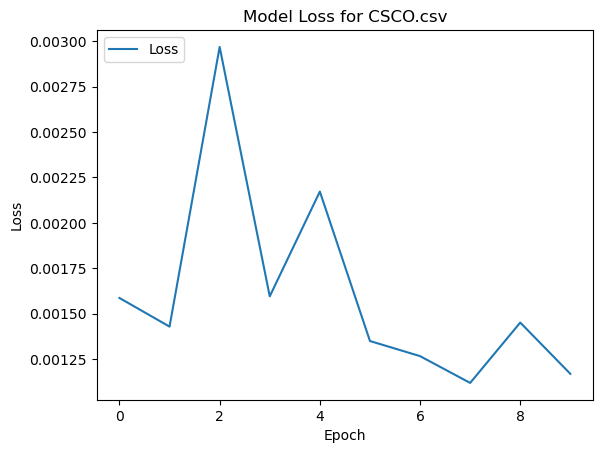

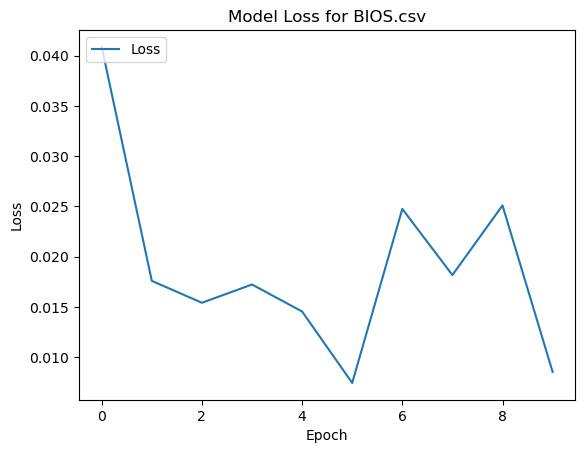

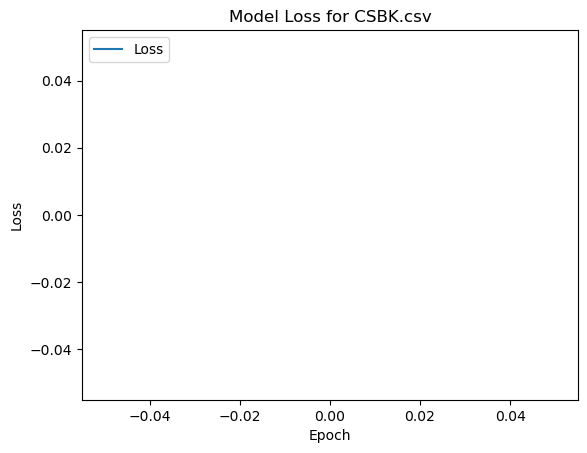

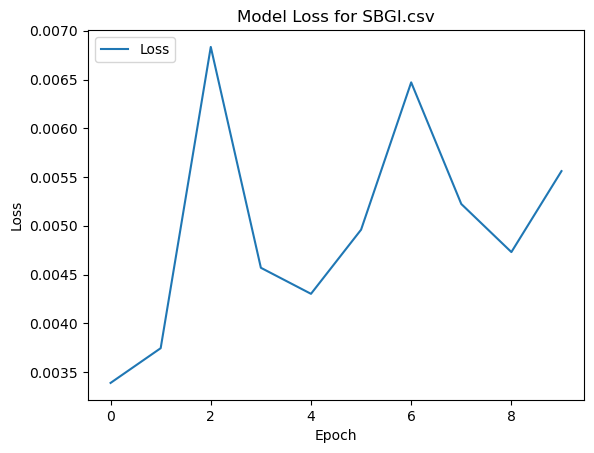

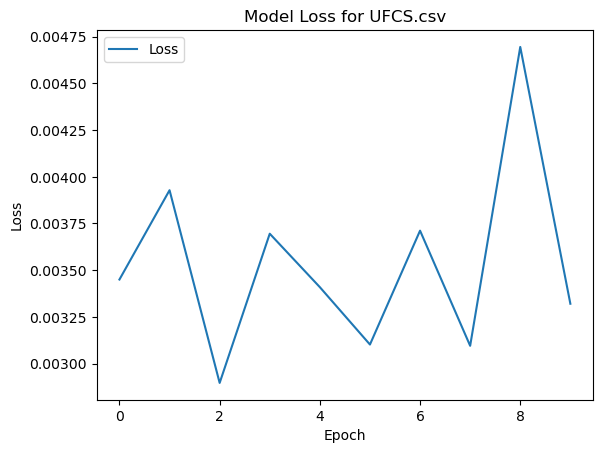

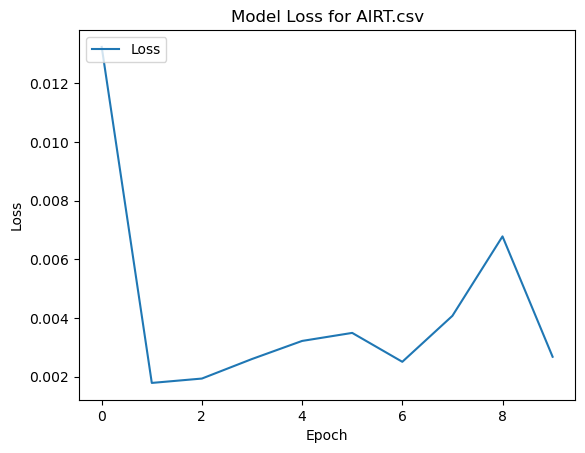

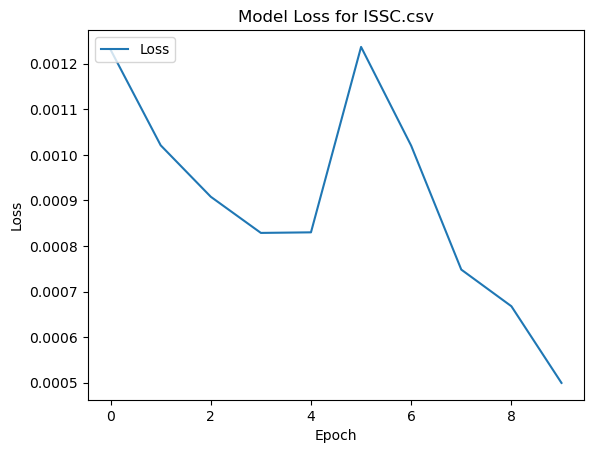

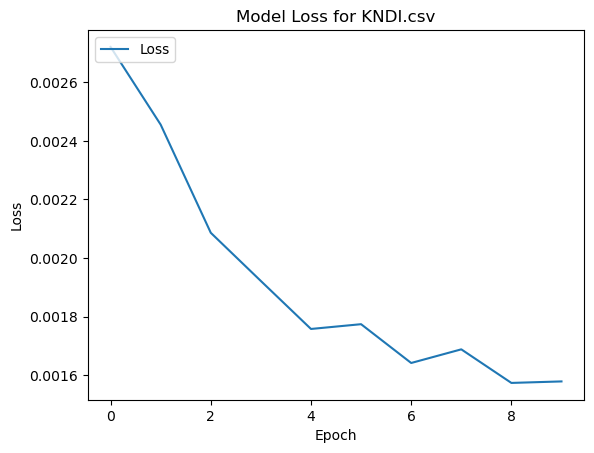

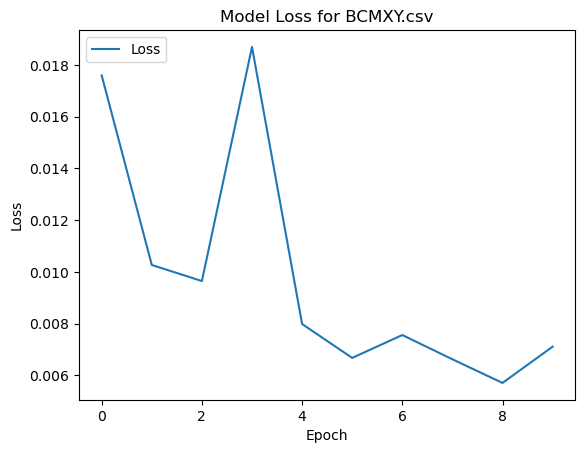

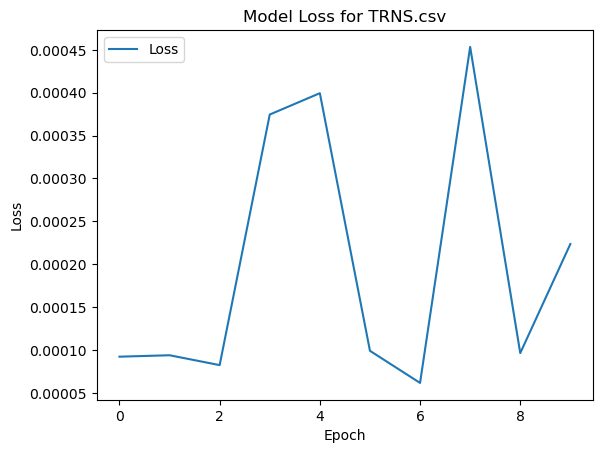

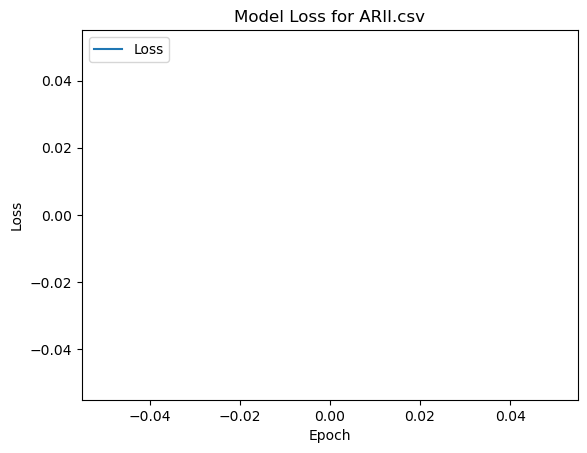

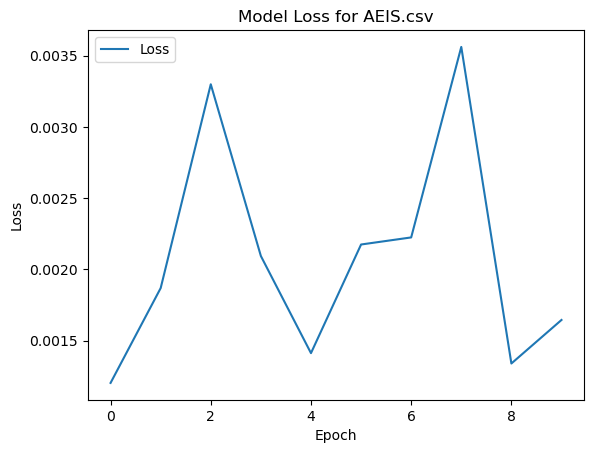

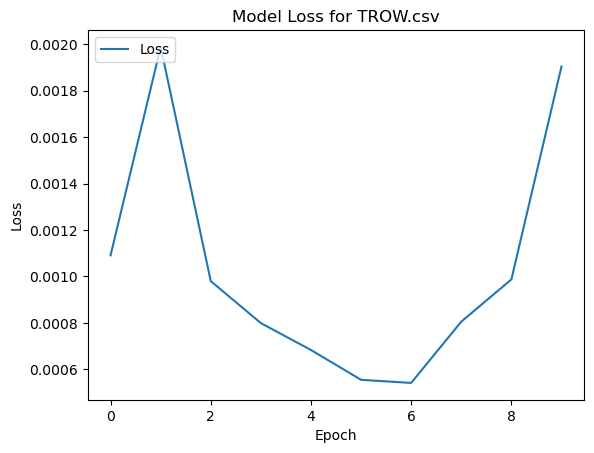

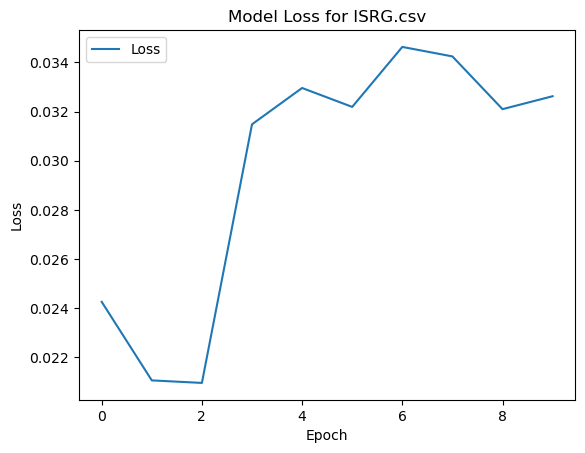

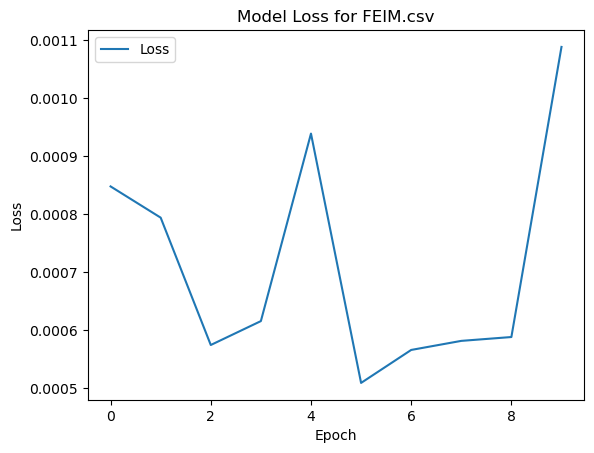

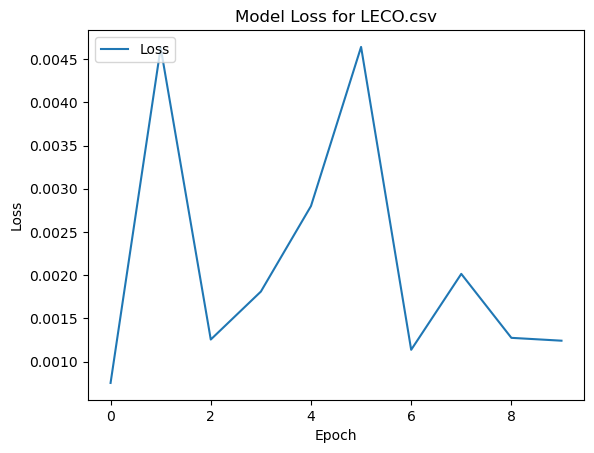

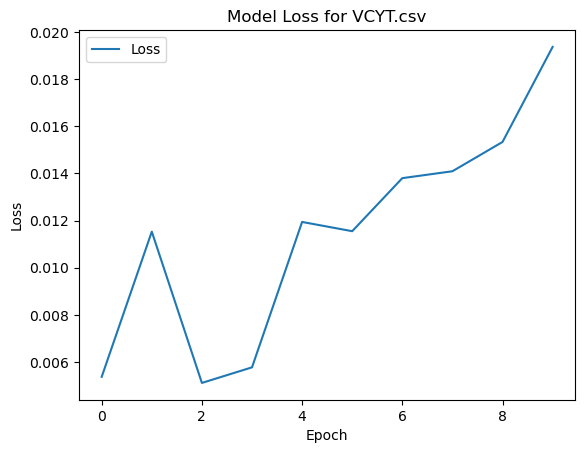

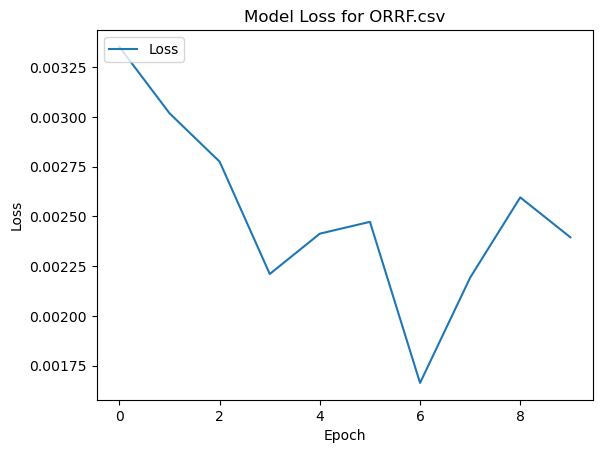

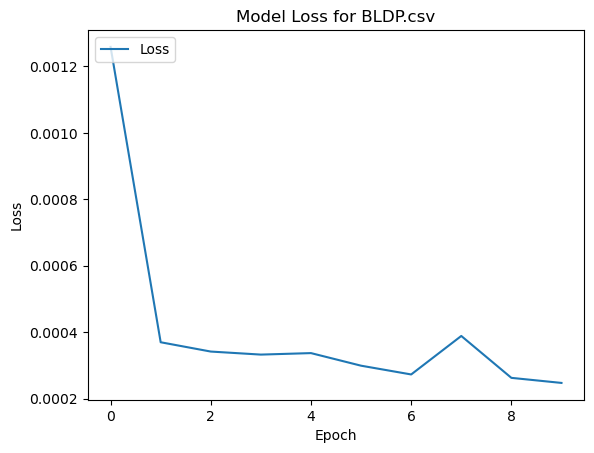

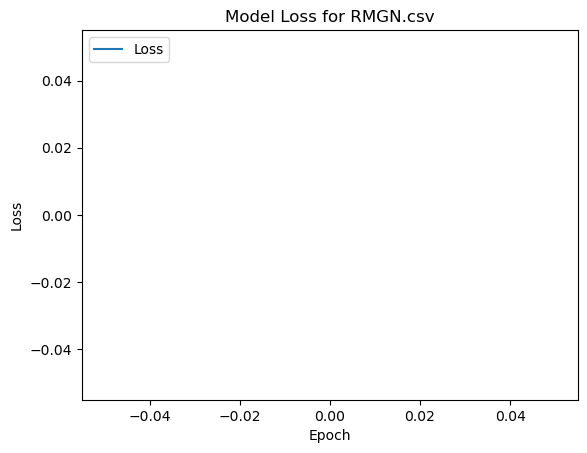

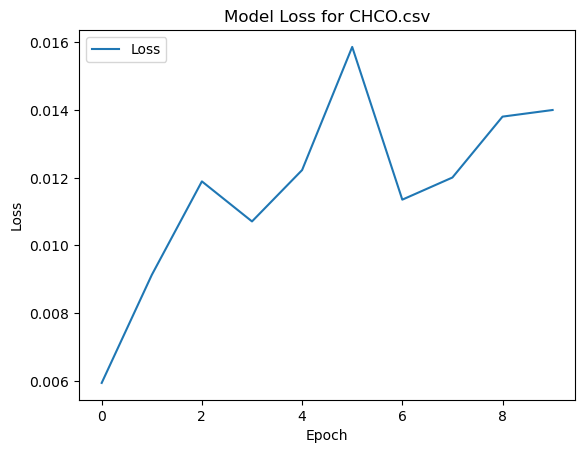

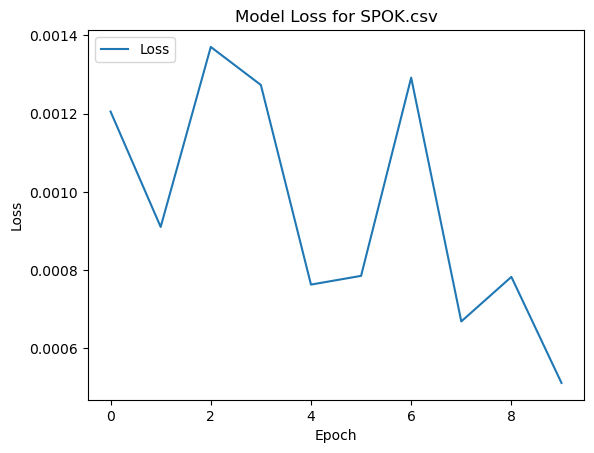

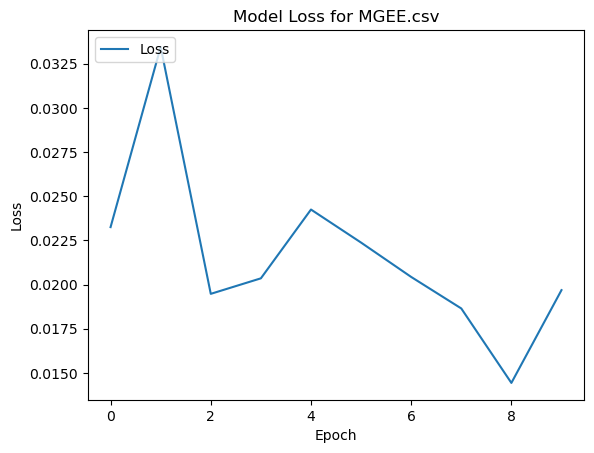

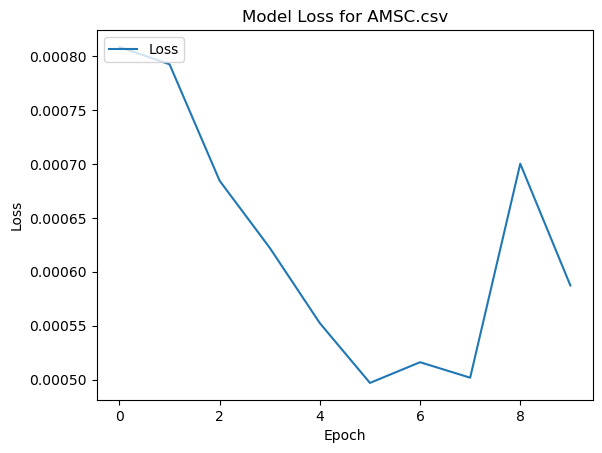

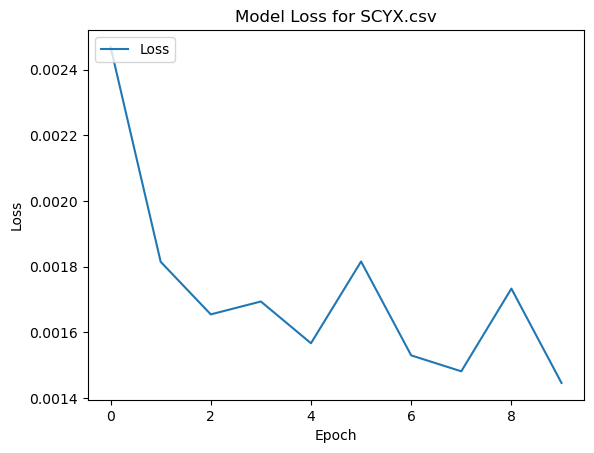

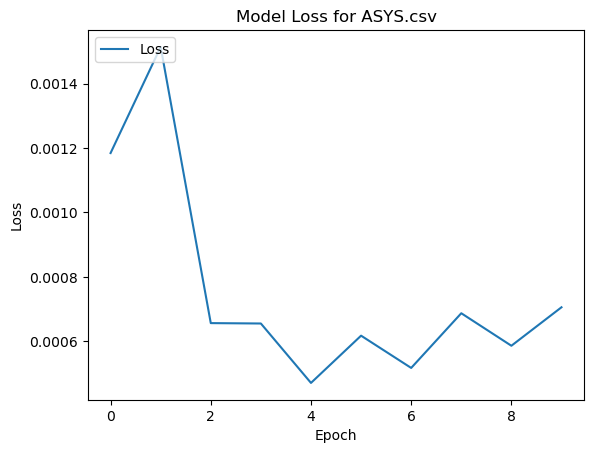

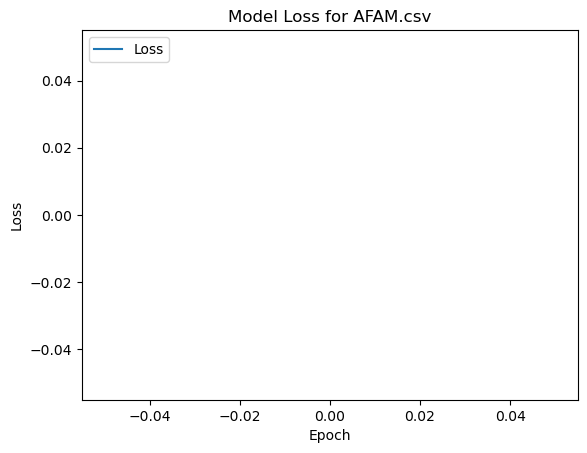

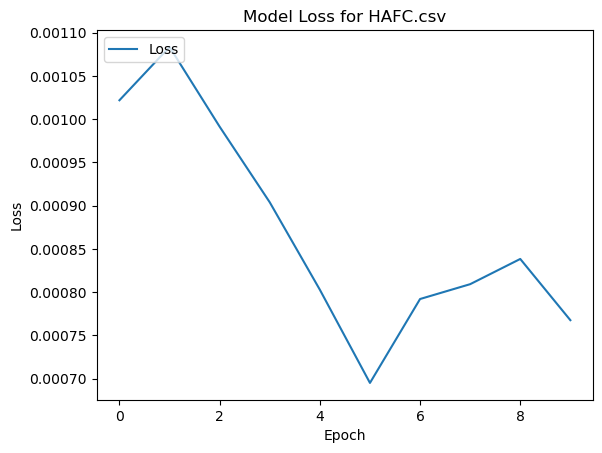

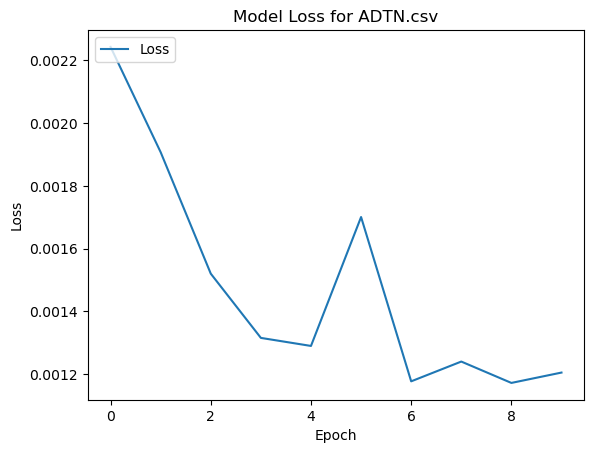

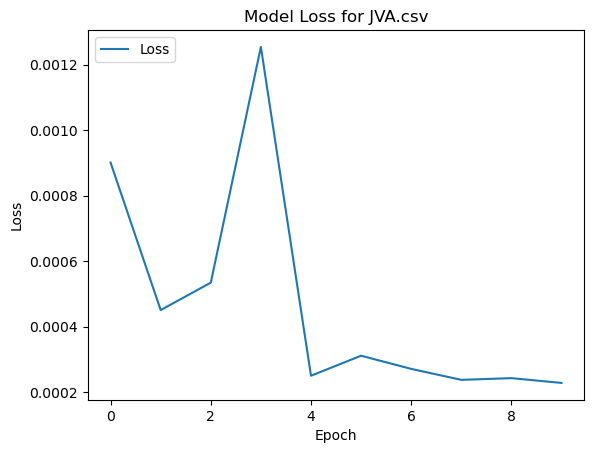

In [17]:
for i in range(len(val_loss_bi)):
    plt.plot(val_loss_bi[i])
    plt.title('Model Loss for ' + company_list[i])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Loss'], loc='upper left')
    plt.show()

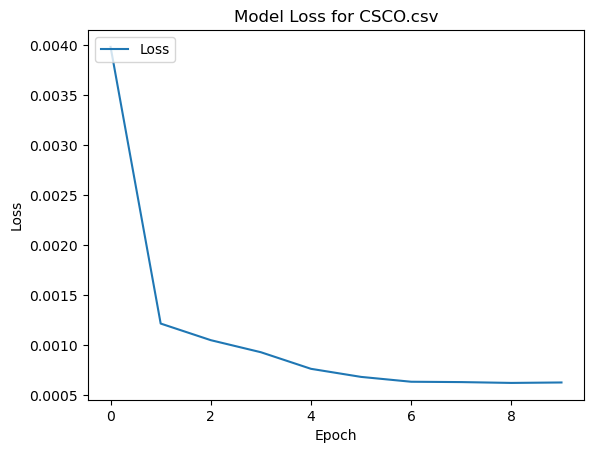

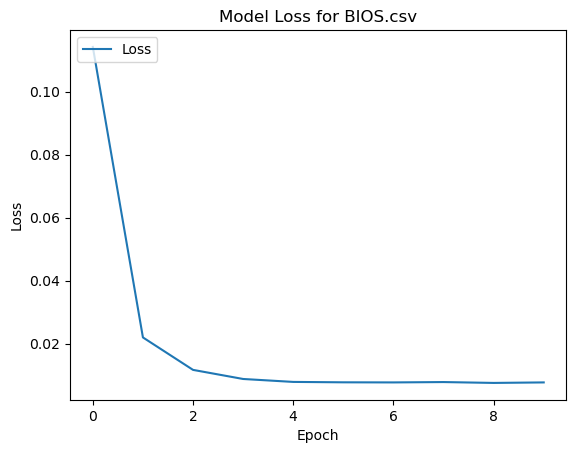

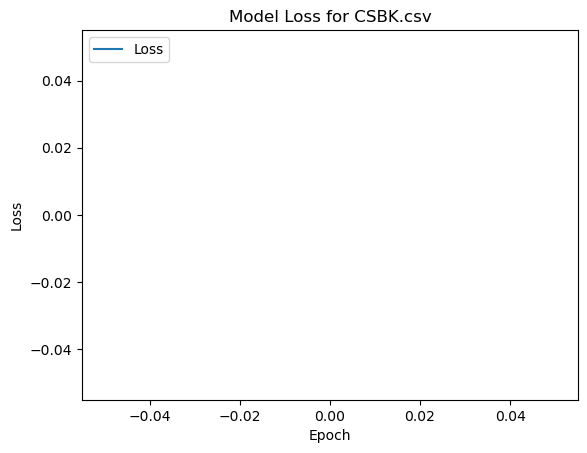

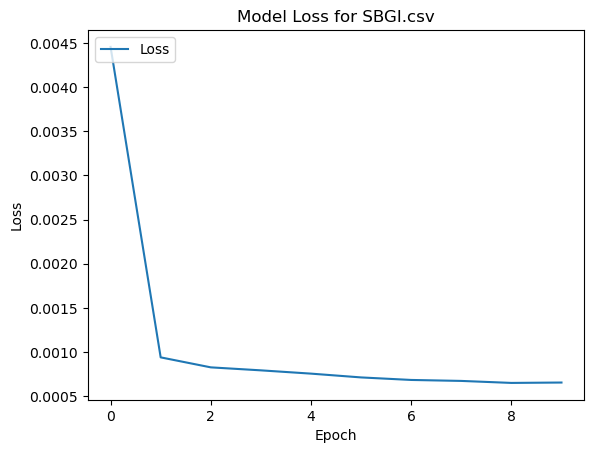

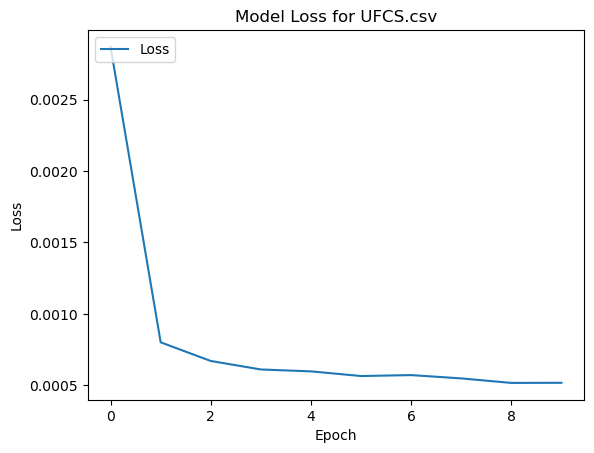

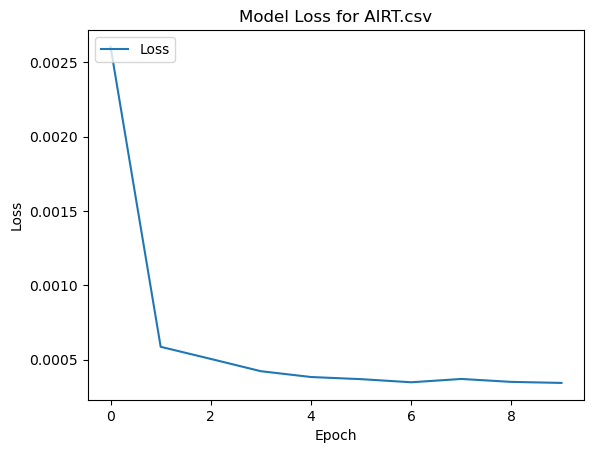

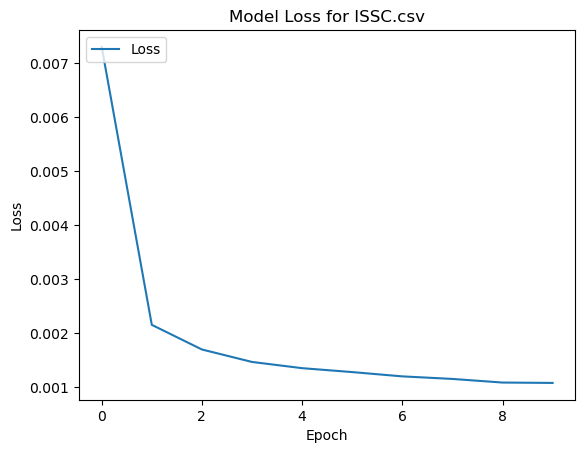

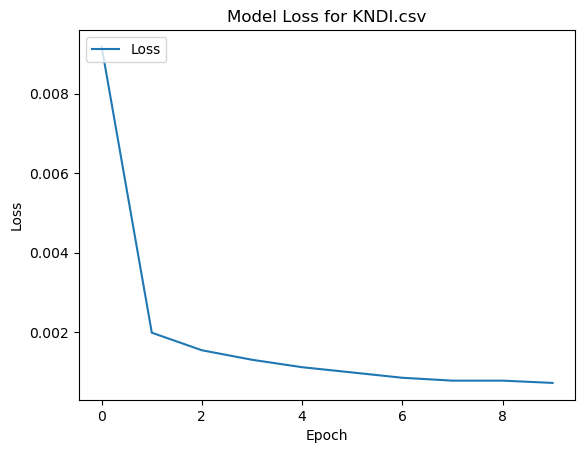

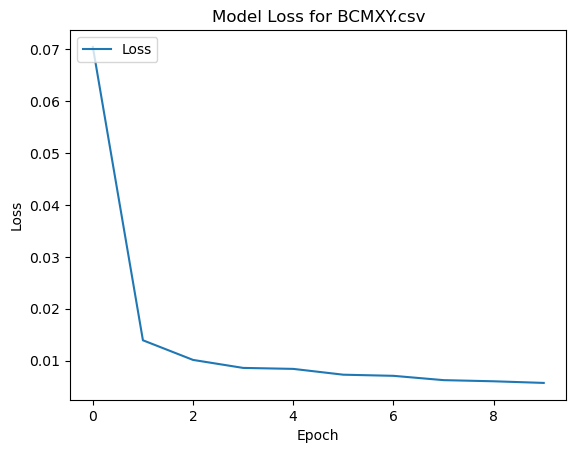

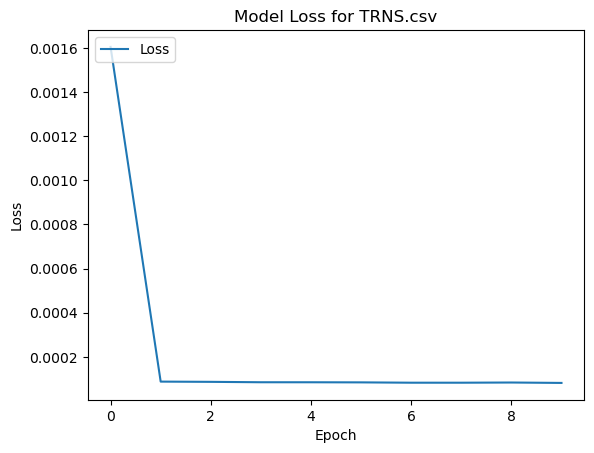

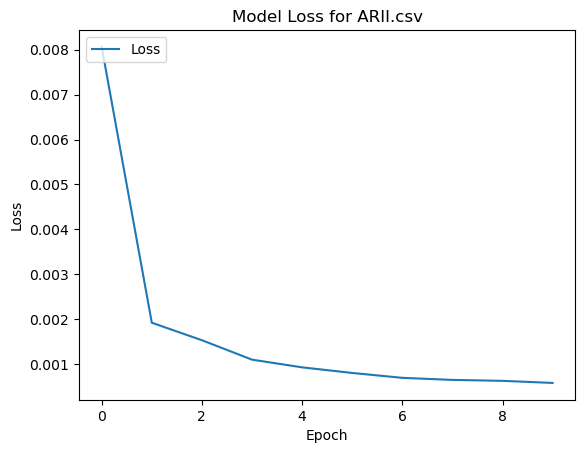

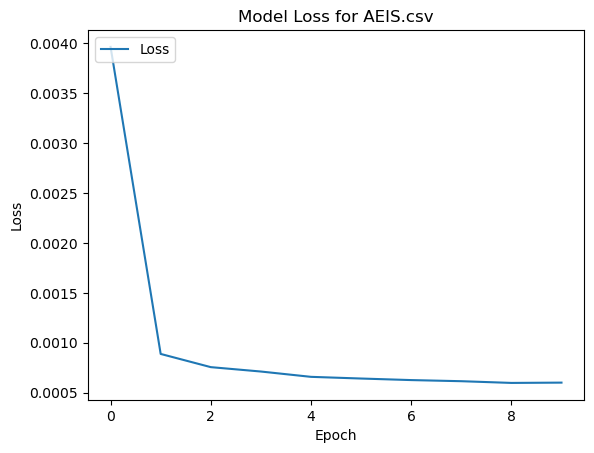

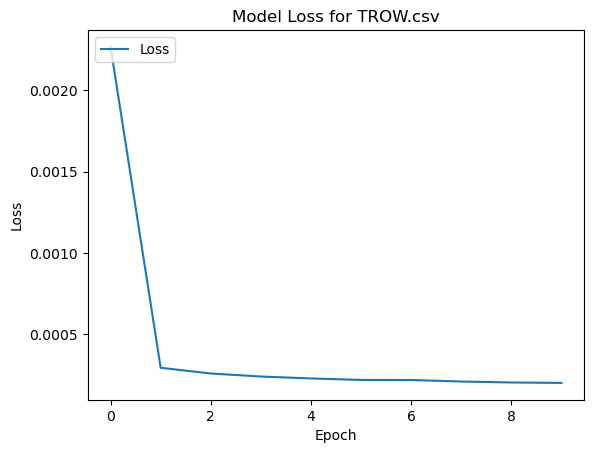

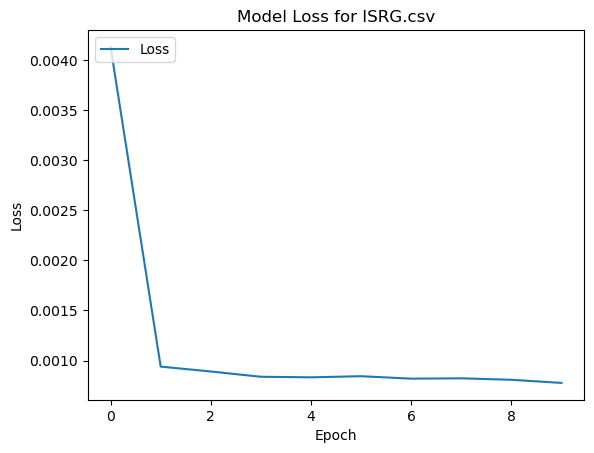

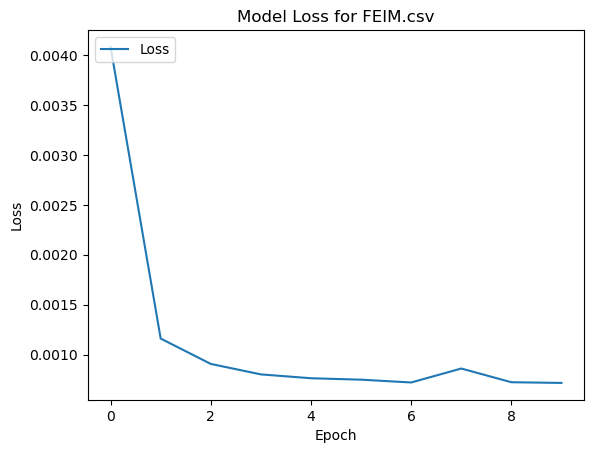

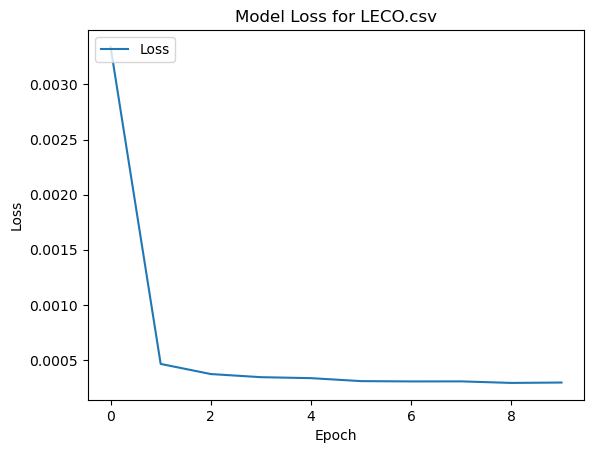

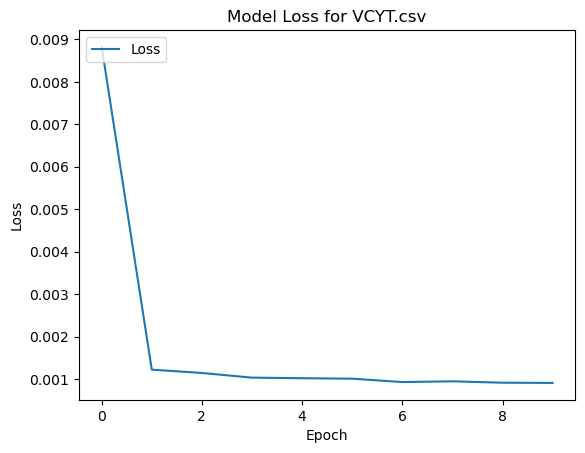

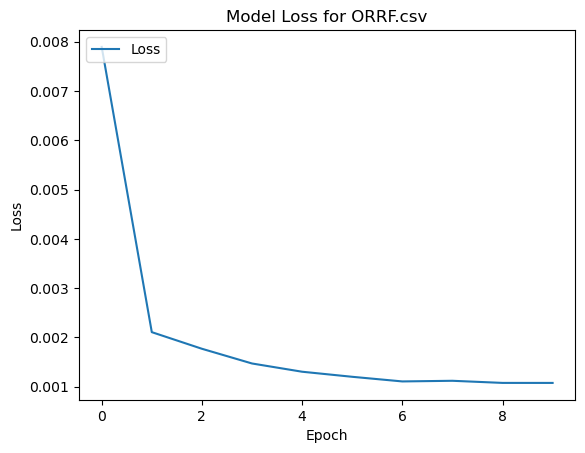

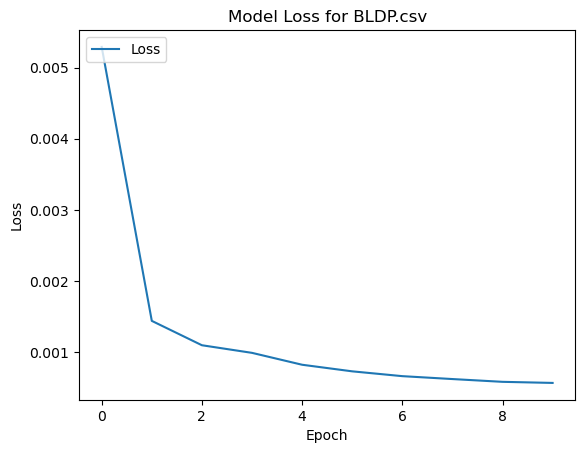

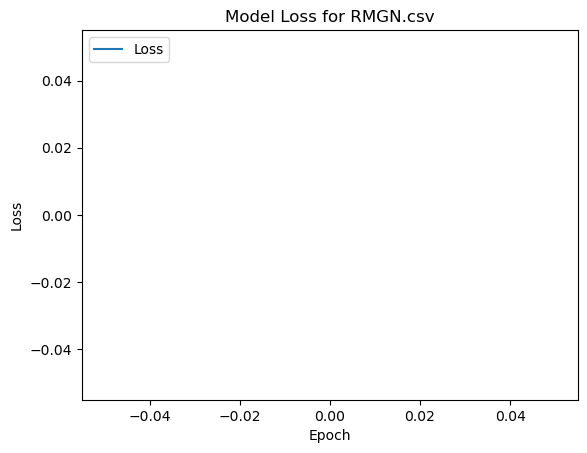

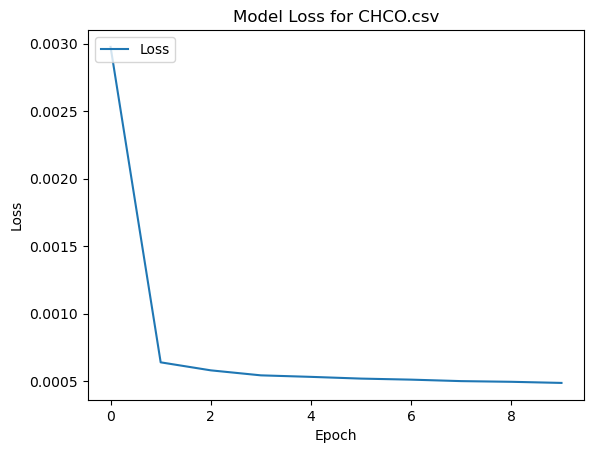

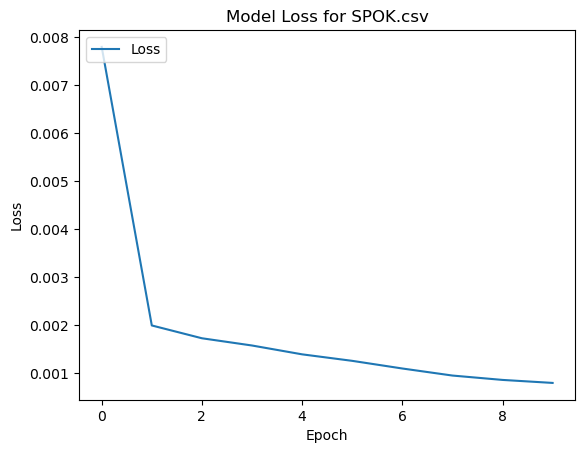

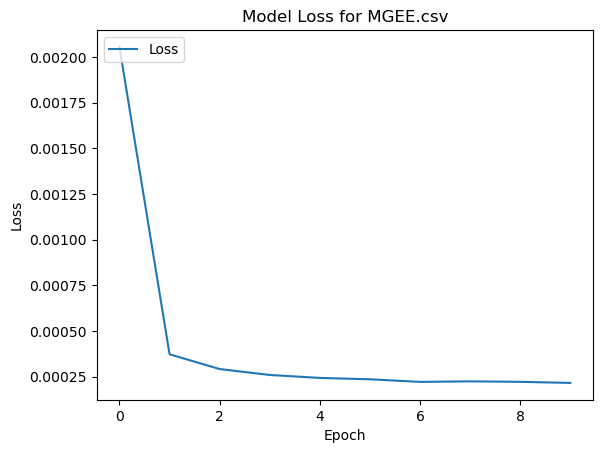

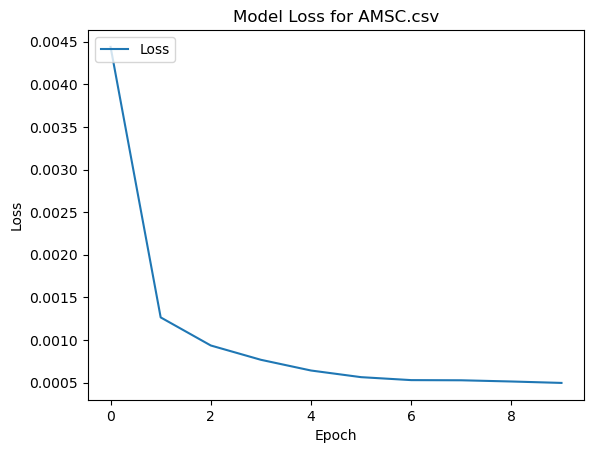

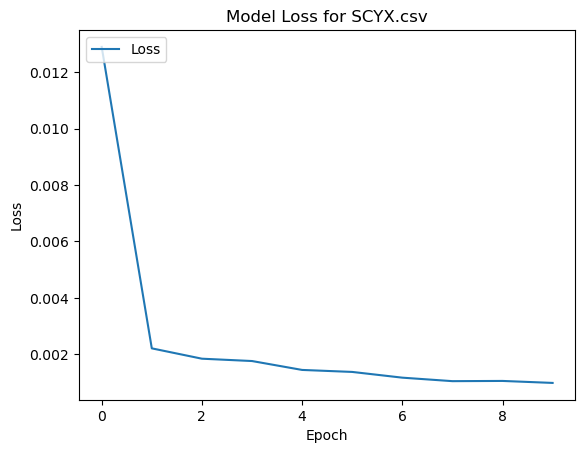

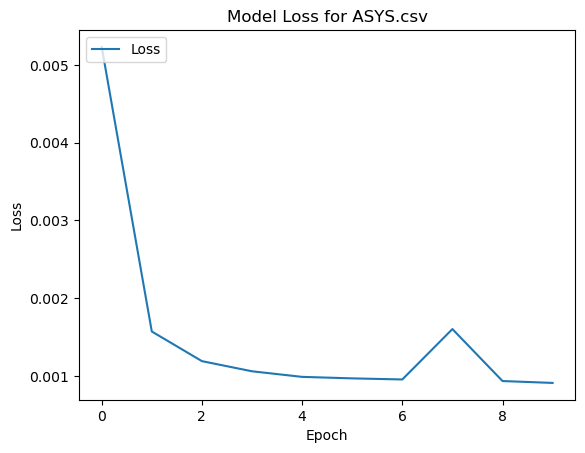

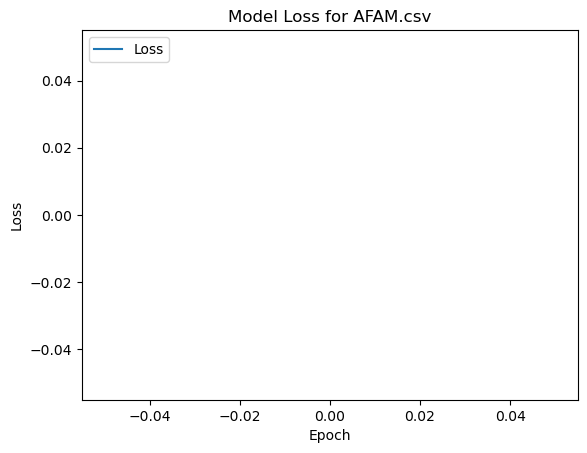

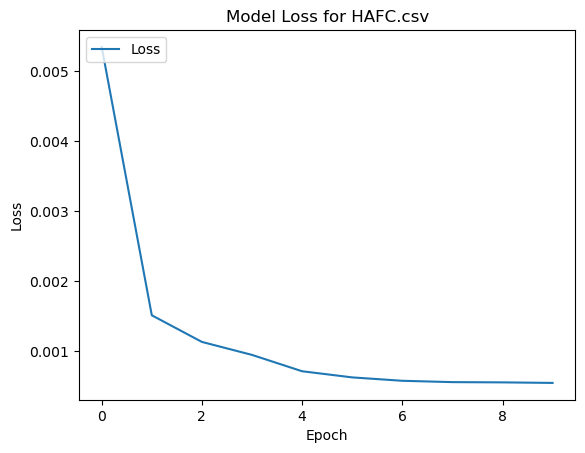

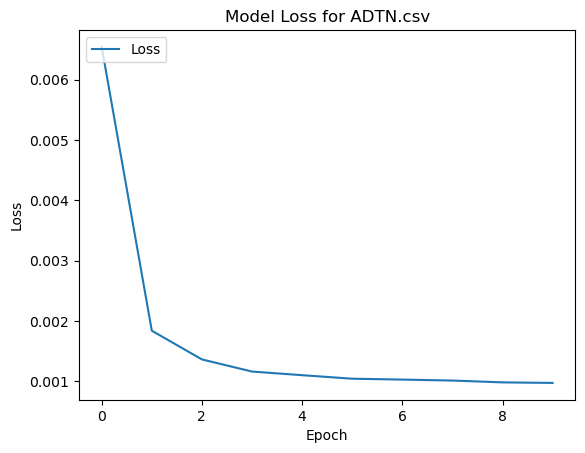

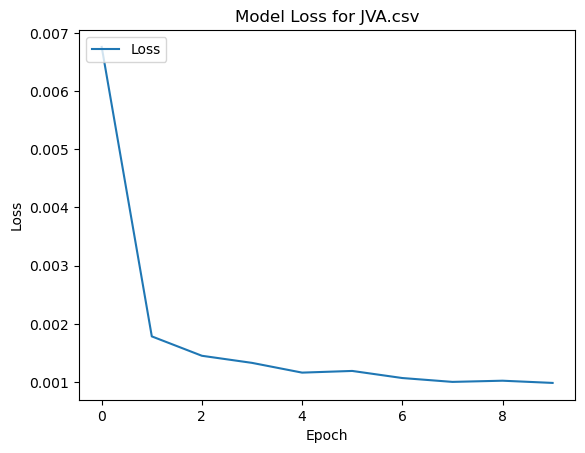

In [32]:
for i in range(len(loss_bi)):
    plt.plot(loss_bi[i])
    plt.title('Model Loss for ' + company_list[i])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Loss'], loc='upper left')
    plt.show()

### Performance on Test Set Accuracy

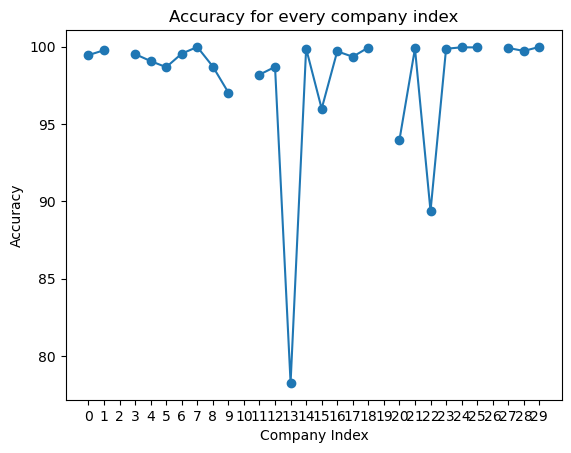

In [19]:
plt.plot(range(len(acc_list_bi)), acc_list_bi, marker='o')
plt.xlabel('Company Index')
plt.ylabel('Accuracy')
plt.title('Accuracy for every company index')
plt.xticks(range(len(acc_list_bi)))  # Set x-axis tick labels
plt.show()

In [20]:
acc_list_bi

[99.44687043316662,
 99.7608428588137,
 nan,
 99.51121895574033,
 99.06040905043483,
 98.66743991151452,
 99.54173779115081,
 99.97201052610762,
 98.7085647881031,
 97.02577851712704,
 nan,
 98.18413369357586,
 98.68575390428305,
 78.27480435371399,
 99.87156420247629,
 95.98302580416203,
 99.6901232516393,
 99.33977387845516,
 99.9352652928792,
 nan,
 93.95549073815346,
 99.87585269846022,
 89.37240540981293,
 99.85532050486654,
 99.9494920601137,
 99.94265890563838,
 nan,
 99.90761603112333,
 99.71433221362531,
 99.97444024484139]

In [27]:
import numpy as np
acc_list_bi = np.array([99.44687043316662,
                        99.7608428588137,
                        np.nan,
                        99.51121895574033,
                        99.06040905043483,
                        98.66743991151452,
                        99.54173779115081,
                        99.97201052610762,
                        98.7085647881031,
                        97.02577851712704,
                        np.nan,
                        98.18413369357586,
                        98.68575390428305,
                        78.27480435371399,
                        99.87156420247629,
                        95.98302580416203,
                        99.6901232516393,
                        99.33977387845516,
                        99.9352652928792,
                        np.nan,
                        93.95549073815346,
                        99.87585269846022,
                        89.37240540981293,
                        99.85532050486654,
                        99.9494920601137,
                        99.94265890563838,
                        np.nan,
                        99.90761603112333,
                        99.71433221362531,
                        99.97444024484139])

# Ignore NaN values when calculating the average
average = np.nanmean(acc_list_bi)

# Print the average
print(average)

97.85411253922994


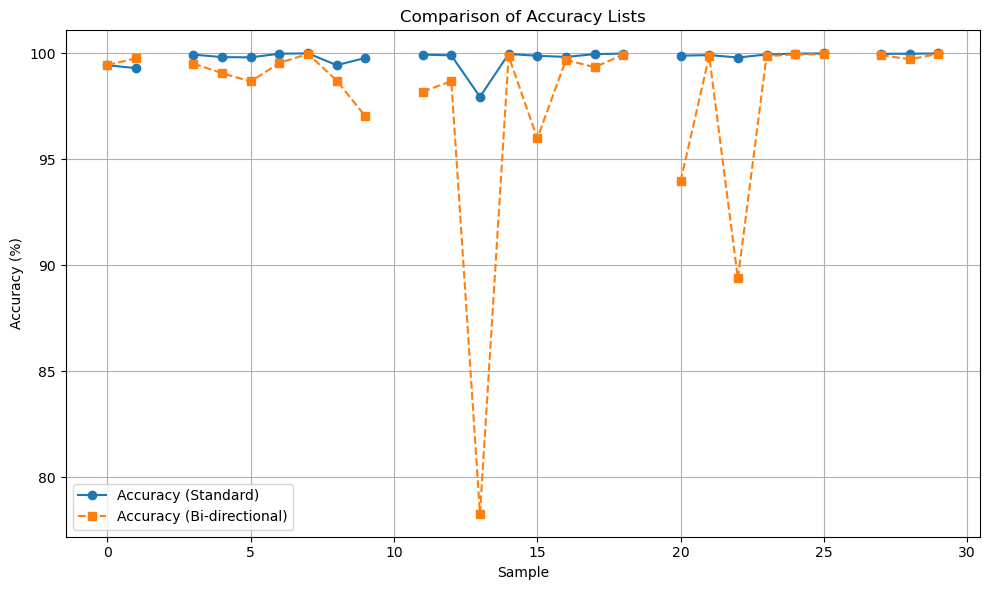

In [30]:
plt.figure(figsize=(10, 6))

# Plot accuracy lists with different line styles
plt.plot(acc_list, label='Accuracy (Standard)', marker='o', linestyle='-')
plt.plot(acc_list_bi, label='Accuracy (Bi-directional)', marker='s', linestyle='--')

# Set labels and title
plt.xlabel('Sample')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Lists')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()